In [35]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import json
import seaborn as sns

DEFAULT_METRICS = [
    'time',
    'adjusted_mutual_info_score', 'adjusted_rand_score', 'completeness_score', 'homogeneity_score', 'v_measure_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 
    'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score',
]

# if looking for a particular export: provide name in format 'res_YYYY_MM_DD_THH_MM_SS'
RESULTS_DIR = None

In [36]:
# calculate last export generated if none is specified, read in files
if RESULTS_DIR == None:
    dir_list = next(os.walk('results/'))[1]
    RESULTS_DIR = max(dir_list)

full_path    = f'results/{RESULTS_DIR}'
results_dump = f'{full_path}/results_dump.json'

print(f'Reading from results dump: \033[1m{results_dump}')

Reading from results dump: results/res_2024_04_17_T11_16_16/results_dump.json


In [37]:
def json_to_df(path):
  # unzip the file, load in each line as an object
  g = open(path, 'rb')
  g = [json.loads(l) for l in g]

  # map to a dictionary, then load in as a dataframe
  dict_df = {i: d for (i, d) in enumerate(g)}
  return pd.DataFrame.from_dict(dict_df, orient='index')

# extract the dataframe, reorder columns, display sample
results_df = json_to_df(results_dump)
results_df = results_df[[
  'log_time', 'experiment', 'variant', 'n_points', 'noise',
  'time', 'timed_out',
  'adjusted_mutual_info_score', 'adjusted_rand_score', 'completeness_score', 'homogeneity_score', 'v_measure_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 
  'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score',
]]
results_df

log_time                experiment  variant  \
0      2024-04-08 21:01:57.284231                   DEFAULT  DEFAULT   
1      2024-04-08 21:01:57.301920                   DEFAULT  DEFAULT   
2      2024-04-08 21:01:57.318775                   DEFAULT  DEFAULT   
3      2024-04-08 21:01:57.334392                   DEFAULT  DEFAULT   
4      2024-04-08 21:01:57.350130                   DEFAULT  DEFAULT   
...                           ...                       ...      ...   
32527  2024-04-17 22:28:30.127573  Refinement k Impact MKNN      300   
32528  2024-04-17 22:28:30.774206  Refinement k Impact MKNN      300   
32529  2024-04-17 22:28:31.448815  Refinement k Impact MKNN      300   
32530  2024-04-17 22:28:32.118057  Refinement k Impact MKNN      300   
32531  2024-04-17 22:28:32.777696  Refinement k Impact MKNN      300   

       n_points  noise      time timed_out  adjusted_mutual_info_score  \
0           100    0.1  0.010119     False                    0.857516   
1           100    0.1  0.008369     False                    0.928602   
2           100    0.1  0.008701     False                    0.763108   
3           100    0.1  0.007630     False                    1.000000   
4           100    0.1  0.007718     False                    1.000000   
...         ...    ...       ...       ...                         ...   
32527      1000    0.2  0.614484     False                    0.335445   
32528      1000    0.2  0.620976     False                    0.293993   
32529      1000    0.2  0.648741     False                    0.281288   
32530      1000    0.2  0.646013     False                    0.277623   
32531      1000    0.2  0.633184     False                    0.293620   

       adjusted_rand_score  completeness_score  homogeneity_score  \
0                 0.920800            0.858559           0.858559   
1                 0.959996            0.929259           0.928991   
2                 0.844835            0.765286           0.764403   
3                 1.000000            1.000000           1.000000   
4                 1.000000            1.000000           1.000000   
...                    ...                 ...                ...   
32527             0.427143            0.336007           0.335843   
32528             0.378834            0.294531           0.294476   
32529             0.361767            0.282150           0.281465   
32530             0.359359            0.278159           0.278130   
32531             0.376374            0.294489           0.293774   

       v_measure_score  normalized_mutual_info_score  fowlkes_mallows_score  \
0             0.858559                      0.858559               0.960000   
1             0.929125                      0.929125               0.979800   
2             0.764844                      0.764844               0.921697   
3             1.000000                      1.000000               1.000000   
4             1.000000                      1.000000               1.000000   
...                ...                           ...                    ...   
32527         0.335925                      0.335925               0.713382   
32528         0.294504                      0.294504               0.689146   
32529         0.281807                      0.281807               0.681102   
32530         0.278145                      0.278145               0.679382   
32531         0.294131                      0.294131               0.688400   

       silhouette_score  calinski_harabasz_score  davies_bouldin_score  
0              0.330102                67.985476              1.120876  
1              0.333458                70.237779              1.102076  
2              0.356151                76.875819              1.051469  
3              0.310239                61.837324              1.183553  
4              0.306017                59.807709              1.204404  
...                 ...                      ...       

In [38]:
# extract all the experiments and variants present in the dump
experiment_variants = results_df.groupby('experiment')['variant'].apply(set)
print('The following experiments and variants were found in results dump:')
padding = max([len(x) for x in experiment_variants.index])

for (experiment, variants) in experiment_variants.items():
    variants = [str(x) for x in variants]
    print(f'\033[1m{experiment:<{padding}}\033[0m: {", ".join(variants)}')

The following experiments and variants were found in results dump:
Affinity                : euclidean, manhattan
DEFAULT                 : DEFAULT
Decomposition           : dense, sparse_eigh, dense_eigh, sparse
Laplacian               : normalised, standard
Refinement              : knn, eps, mutual_knn, none
Refinement EPS Impact   : 0.0, 0.13793103448275862, 0.1724137931034483, 0.24137931034482757, 0.27586206896551724, 0.3103448275862069, 0.41379310344827586, 0.48275862068965514, 0.5172413793103449, 0.6206896551724138, 0.8275862068965517, 1.0, 0.6551724137931034, 0.10344827586206896, 0.896551724137931, 0.7241379310344828, 0.5517241379310345, 0.9655172413793103, 0.3793103448275862, 0.06896551724137931, 0.20689655172413793, 0.7931034482758621, 0.4482758620689655, 0.8620689655172413, 0.034482758620689655, 0.6896551724137931, 0.9310344827586207, 0.3448275862068966, 0.7586206896551724, 0.5862068965517241
Refinement k Impact KNN : 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 4

In [39]:
# show summary tables of results for each experiment
experiment_variants = results_df.groupby('experiment')['variant'].apply(set)
for (experiment, variants) in experiment_variants.items():
    
    experiment_results = results_df[(results_df['experiment'] == experiment)]
    experiment_results = experiment_results[['variant', 'noise', 'time', 'n_points', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'completeness_score', 'homogeneity_score', 'v_measure_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'silhouette_score', 'calinski_harabasz_score', 'davies_bouldin_score',]]
    experiment_results.columns = ['Variant', 'Noise', 'Time', 'n points', 'AMI', 'ARI', 'Comp_scr', 'Homo_scr', 'V_scr', 'NMI', 'FMI', 'Sil_scr', 'CHI', 'DBI',]
    summarised = experiment_results.groupby(['Variant', 'Noise', 'n points']).agg(['mean', 'std'])
    
    print(experiment)
    display(summarised)

Affinity


Time                 AMI                 ARI  \
                              mean       std      mean       std      mean   
Variant   Noise n points                                                     
euclidean 0.0   100       0.008078  0.000060  1.000000  0.000000  1.000000   
                200       0.019853  0.000148  1.000000  0.000000  1.000000   
                300       0.044261  0.007406  1.000000  0.000000  1.000000   
                400       0.088377  0.040838  1.000000  0.000000  1.000000   
                500       0.109364  0.050648  1.000000  0.000000  1.000000   
...                            ...       ...       ...       ...       ...   
manhattan 0.2   2600      4.934151  0.089963  0.368566  0.015721  0.461353   
                2700      5.429951  0.158375  0.215234  0.196865  0.271990   
                2800      5.969613  0.039473  0.216438  0.198252  0.268769   
                2900      6.714482  0.106008  0.066203  0.148035  0.081880   
                3000      8.433736  0.624300  0.295922  0.166159  0.370769   

                                    Comp_scr            Homo_scr            \
                               std      mean       std      mean       std   
Variant   Noise n points                                                     
euclidean 0.0   100       0.000000  1.000000  0.000000  1.000000  0.000000   
                200       0.000000  1.000000  0.000000  1.000000  0.000000   
                300       0.000000  1.000000  0.000000  1.000000  0.000000   
                400       0.000000  1.000000  0.000000  1.000000  0.000000   
                500       0.000000  1.000000  0.000000  1.000000  0.000000   
...                            ...       ...       ...       ...       ...   
manhattan 0.2   2600      0.021704  0.369414  0.015470  0.368080  0.016082   
                2700      0.248682  0.246594  0.154491  0.215386  0.196665   
                2800      0.245895  0.249510  0.155385  0.215843  0.197452   
                2900      0.183089  0.128481  0.114504  0.066093  0.147016   
                3000      0.207738  0.311884  0.132307  0.295670  0.165779   

                          ...       NMI                 FMI            \
                          ...      mean       std      mean       std   
Variant   Noise n points  ...                                           
euclidean 0.0   100       ...  1.000000  0.000000  1.000000  0.000000   
                200       ...  1.000000  0.000000  1.000000  0.000000   
                300       ...  1.000000  0.000000  1.000000  0.000000   
                400       ...  1.000000  0.000000  1.000000  0.000000   
                500       ...  1.000000  0.000000  1.000000  0.000000   
...                       ...       ...       ...       ...       ...   
manhattan 0.2   2600      ...  0.368742  0.015716  0.731281  0.010024   
                2700      ...  0.215631  0.196555  0.718723  0.012992   
                2800      ...  0.216821  0.197955  0.717714  0.013621   
                2900      ...  0.066786  0.147803  0.706831  0.000202   
                3000      ...  0.296177  0.165930  0.727079  0.013591   

                           Sil_scr                        CHI                \
                              mean           std         mean           std   
Variant   Noise n points                                                      
euclidean 0.0   100       0.316148  5.551115e-17    62.490977  1.703822e-14   
                200       0.328316  3.925231e-17   129.587432  6.815287e-14   
                300       0.332353  0.000000e+00   196.733115  6.194368e-14   
                400       0.334369  3.925231e-17   263.891284  7.519677e-14   
                500       0.335577  3.925231e-17   331.054475  8.987734e-14   
...                            ...           ...          ...           ...   
manhattan 0.2   2600      0.451661  3.128173e-03  3076.753521  6.628791e+01   
                2700      0.393

DEFAULT


Time                 AMI                 ARI  \
                            mean       std      mean       std      mean   
Variant Noise n points                                                     
DEFAULT 0.0   100       0.109499  0.228289  1.000000  0.000000  1.000000   
              200       0.026909  0.015310  1.000000  0.000000  1.000000   
              300       0.041533  0.000340  1.000000  0.000000  1.000000   
              400       0.062092  0.001374  1.000000  0.000000  1.000000   
              500       0.092803  0.002618  1.000000  0.000000  1.000000   
...                          ...       ...       ...       ...       ...   
        0.2   2600      4.949171  0.097721  0.223987  0.204807  0.274199   
              2700      5.771818  0.557492  0.227458  0.208669  0.286289   
              2800      6.219074  0.113136  0.297391  0.167474  0.372894   
              2900      6.962688  0.341977  0.359840  0.019675  0.455144   
              3000      8.617199  0.149792  0.219541  0.200559  0.275917   

                                  Comp_scr            Homo_scr            ...  \
                             std      mean       std      mean       std  ...   
Variant Noise n points                                                    ...   
DEFAULT 0.0   100       0.000000  1.000000  0.000000  1.000000  0.000000  ...   
              200       0.000000  1.000000  0.000000  1.000000  0.000000  ...   
              300       0.000000  1.000000  0.000000  1.000000  0.000000  ...   
              400       0.000000  1.000000  0.000000  1.000000  0.000000  ...   
              500       0.000000  1.000000  0.000000  1.000000  0.000000  ...   
...                          ...       ...       ...       ...       ...  ...   
        0.2   2600      0.250361  0.256707  0.163537  0.222960  0.203404  ...   
              2700      0.262405  0.258735  0.166372  0.227686  0.208543  ...   
              2800      0.209618  0.313402  0.133390  0.297226  0.167170  ...   
              2900      0.022327  0.360073  0.019686  0.359927  0.019655  ...   
              3000      0.252029  0.250681  0.158752  0.219512  0.200227  ...   

                             NMI                 FMI             Sil_scr  \
                            mean       std      mean       std      mean   
Variant Noise n points                                                     
DEFAULT 0.0   100       1.000000  0.000000  1.000000  0.000000  0.316148   
              200       1.000000  0.000000  1.000000  0.000000  0.328316   
              300       1.000000  0.000000  1.000000  0.000000  0.332353   
              400       1.000000  0.000000  1.000000  0.000000  0.334369   
              500       1.000000  0.000000  1.000000  0.000000  0.335577   
...                          ...       ...       ...       ...       ...   
        0.2   2600      0.224398  0.204484  0.720967  0.013217  0.385441   
              2700      0.227853  0.208357  0.725793  0.021011  0.424213   
              2800      0.297662  0.167229  0.728074  0.016289  0.412670   
              2900      0.360000  0.019671  0.727554  0.011173  0.453699   
              3000      0.219899  0.200279  0.720866  0.013592  0.398553   

                                              CHI                     DBI  \
                                 std         mean           std      mean   
Variant Noise n points                                                      
DEFAULT 0.0   100       6.206335e-17    62.490977  1.776357e-14  1.181419   
              200       5.551115e-17   129.587432  5.317215e-14  1.164920   
              300       2.775558e-17   196.733115  4.493867e-14  1.159485   
              400       3.925231e-17   263.891284  1.774935e-13  1.156779   
              500       4.807407e-17   331.054475  2.029716e-13  1.155159   
...                              ...          ...           ...       ...   
        0.2   2600      9.133247e-02  1837.958788  1.675884e+03  0.694

Decomposition


Time                 AMI                 ARI  \
                                mean       std      mean       std      mean   
Variant     Noise n points                                                     
dense       0.0   100       0.007755  0.000194  1.000000  0.000000  1.000000   
                  200       0.020060  0.000253  1.000000  0.000000  1.000000   
                  300       0.074721  0.054612  1.000000  0.000000  1.000000   
                  400       0.098121  0.054085  1.000000  0.000000  1.000000   
                  500       0.143539  0.054891  1.000000  0.000000  1.000000   
...                              ...       ...       ...       ...       ...   
sparse_eigh 0.2   2600      0.686598  0.140960  0.212187  0.193911  0.267084   
                  2700      0.732320  0.076309  0.204100  0.186713  0.257626   
                  2800      0.968199  0.223823  0.348389  0.029571  0.435715   
                  2900      0.944649  0.240444  0.220221  0.202624  0.275585   
                  3000      1.153699  0.145341  0.287929  0.161514  0.361783   

                                      Comp_scr            Homo_scr            \
                                 std      mean       std      mean       std   
Variant     Noise n points                                                     
dense       0.0   100       0.000000  1.000000  0.000000  1.000000  0.000000   
                  200       0.000000  1.000000  0.000000  1.000000  0.000000   
                  300       0.000000  1.000000  0.000000  1.000000  0.000000   
                  400       0.000000  1.000000  0.000000  1.000000  0.000000   
                  500       0.000000  1.000000  0.000000  1.000000  0.000000   
...                              ...       ...       ...       ...       ...   
sparse_eigh 0.2   2600      0.244435  0.245060  0.149995  0.212081  0.193640   
                  2700      0.235613  0.235717  0.144587  0.204004  0.186287   
                  2800      0.026230  0.349597  0.030935  0.347536  0.028264   
                  2900      0.252990  0.251620  0.161214  0.220062  0.202124   
                  3000      0.202942  0.303889  0.127528  0.287680  0.161208   

                            ...       NMI                 FMI            \
                            ...      mean       std      mean       std   
Variant     Noise n points  ...                                           
dense       0.0   100       ...  1.000000  0.000000  1.000000  0.000000   
                  200       ...  1.000000  0.000000  1.000000  0.000000   
                  300       ...  1.000000  0.000000  1.000000  0.000000   
                  400       ...  1.000000  0.000000  1.000000  0.000000   
                  500       ...  1.000000  0.000000  1.000000  0.000000   
...                         ...       ...       ...       ...       ...   
sparse_eigh 0.2   2600      ...  0.212600  0.193592  0.716426  0.012435   
                  2700      ...  0.204501  0.186407  0.711843  0.008458   
                  2800      ...  0.348558  0.029564  0.718780  0.014067   
                  2900      ...  0.220591  0.202336  0.720803  0.018753   
                  3000      ...  0.288185  0.161286  0.722647  0.012036   

                             Sil_scr                        CHI                \
                                mean           std         mean           std   
Variant     Noise n points                                                      
dense       0.0   100       0.316148  4.807407e-17    62.490977  2.682240e-14   
                  200       0.328316  4.807407e-17   129.587432  8.987734e-14   
                  300       0.332353  0.000000e+00   196.733115  1.238874e-13   
                  400       0.334369  7.343435e-17   263.891284  1.024759e-13   
                  500       0.335577  3.925231e-17   331.054475  1.948494e-13   
...                              ...           ...          ...           ...   
sparse_eig

Laplacian


Time                 AMI                 ARI  \
                               mean       std      mean       std      mean   
Variant    Noise n points                                                     
normalised 0.0   100       0.009807  0.002063  1.000000  0.000000  1.000000   
                 200       0.023248  0.000360  1.000000  0.000000  1.000000   
                 300       0.095847  0.060202  1.000000  0.000000  1.000000   
                 400       0.070691  0.003564  1.000000  0.000000  1.000000   
                 500       0.148557  0.040234  1.000000  0.000000  1.000000   
...                             ...       ...       ...       ...       ...   
standard   0.2   2600      4.961748  0.099723  0.367677  0.030030  0.460200   
                 2700      5.547973  0.117751  0.293508  0.164574  0.369256   
                 2800      6.113200  0.026741  0.290821  0.162992  0.363644   
                 2900      6.763675  0.072836  0.135612  0.186008  0.169691   
                 3000      8.621331  0.163789  0.271539  0.153849  0.343436   

                                     Comp_scr            Homo_scr            \
                                std      mean       std      mean       std   
Variant    Noise n points                                                     
normalised 0.0   100       0.000000  1.000000  0.000000  1.000000  0.000000   
                 200       0.000000  1.000000  0.000000  1.000000  0.000000   
                 300       0.000000  1.000000  0.000000  1.000000  0.000000   
                 400       0.000000  1.000000  0.000000  1.000000  0.000000   
                 500       0.000000  1.000000  0.000000  1.000000  0.000000   
...                             ...       ...       ...       ...       ...   
standard   0.2   2600      0.034535  0.368504  0.029965  0.367205  0.030091   
                 2700      0.206988  0.309486  0.130083  0.293455  0.164346   
                 2800      0.203671  0.307131  0.128866  0.290365  0.162529   
                 2900      0.232596  0.182519  0.144541  0.135411  0.185244   
                 3000      0.194057  0.287410  0.120292  0.271386  0.153565   

                           ...       NMI                 FMI            \
                           ...      mean       std      mean       std   
Variant    Noise n points  ...                                           
normalised 0.0   100       ...  1.000000  0.000000  1.000000  0.000000   
                 200       ...  1.000000  0.000000  1.000000  0.000000   
                 300       ...  1.000000  0.000000  1.000000  0.000000   
                 400       ...  1.000000  0.000000  1.000000  0.000000   
                 500       ...  1.000000  0.000000  1.000000  0.000000   
...                        ...       ...       ...       ...       ...   
standard   0.2   2600      ...  0.367853  0.030021  0.730674  0.017014   
                 2700      ...  0.293791  0.164320  0.726166  0.013203   
                 2800      ...  0.291095  0.162748  0.723772  0.011427   
                 2900      ...  0.136090  0.185722  0.709395  0.006624   
                 3000      ...  0.271799  0.153626  0.713387  0.014688   

                            Sil_scr                        CHI                \
                               mean           std         mean           std   
Variant    Noise n points                                                      
normalised 0.0   100       0.316148  2.775558e-17    62.490977  1.178302e-14   
                 200       0.328316  0.000000e+00   129.587432  4.019437e-14   
                 300       0.332353  2.775558e-17   196.733115  9.426415e-14   
                 400       0.334369  7.343435e-17   263.891284  8.038873e-14   
                 500       0.335577  3.925231e-17   331.054475  2.343714e-13   
...                             ...           ...          ...           ...   
standard   0.2   2600      0.453355  6.360376e-03  3109.4003

Refinement


Time                     AMI            \
                            mean       std          mean       std   
Variant Noise n points                                               
eps     0.0   100       0.007906  0.000088  1.000000e+00  0.000000   
              200       0.020034  0.000289  1.000000e+00  0.000000   
              300       0.041558  0.000918  1.000000e+00  0.000000   
              400       0.072216  0.031873  1.000000e+00  0.000000   
              500       0.116026  0.040187  1.000000e+00  0.000000   
...                          ...       ...           ...       ...   
none    0.2   2600      2.598147  0.127190 -2.340305e-15  0.000000   
              2700      2.799968  0.034105  3.984291e-04  0.000748   
              2800      3.154250  0.033364  4.257351e-04  0.000634   
              2900      3.836658  0.617442 -2.513993e-15  0.000000   
              3000      3.955768  0.031530  2.607775e-15  0.000000   

                                 ARI                Comp_scr            \
                                mean           std      mean       std   
Variant Noise n points                                                   
eps     0.0   100       1.000000e+00  0.000000e+00  1.000000  0.000000   
              200       1.000000e+00  0.000000e+00  1.000000  0.000000   
              300       1.000000e+00  0.000000e+00  1.000000  0.000000   
              400       1.000000e+00  0.000000e+00  1.000000  0.000000   
              500       1.000000e+00  0.000000e+00  1.000000  0.000000   
...                              ...           ...       ...       ...   
none    0.2   2600      0.000000e+00  0.000000e+00  0.078228  0.000000   
              2700      2.420373e-06  4.278442e-06  0.022115  0.016783   
              2800      6.126101e-07  9.126817e-07  0.067299  0.037621   
              2900      0.000000e+00  0.000000e+00  0.077273  0.000000   
              3000      0.000000e+00  0.000000e+00  0.076982  0.000000   

                        Homo_scr            ...       NMI                 FMI  \
                            mean       std  ...      mean       std      mean   
Variant Noise n points                      ...                                 
eps     0.0   100       1.000000  0.000000  ...  1.000000  0.000000  1.000000   
              200       1.000000  0.000000  ...  1.000000  0.000000  1.000000   
              300       1.000000  0.000000  ...  1.000000  0.000000  1.000000   
              400       1.000000  0.000000  ...  1.000000  0.000000  1.000000   
              500       1.000000  0.000000  ...  1.000000  0.000000  1.000000   
...                          ...       ...  ...       ...       ...       ...   
none    0.2   2600      0.000385  0.000000  ...  0.000766  0.000000  0.706699   
              2700      0.000504  0.000382  ...  0.000986  0.000748  0.705407   
              2800      0.000572  0.000320  ...  0.001134  0.000634  0.706476   
              2900      0.000345  0.000000  ...  0.000687  0.000000  0.706741   
              3000      0.000333  0.000000  ...  0.000664  0.000000  0.706753   

                                       Sil_scr                       CHI  \
                                 std      mean           std        mean   
Variant Noise n points                                                     
eps     0.0   100       0.000000e+00  0.316148  2.775558e-17   62.490977   
              200       0.000000e+00  0.328316  0.000000e+00  129.587432   
              300       0.000000e+00  0.332353  3.925231e-17  196.733115   
              400       0.000000e+00  0.334369  0.000000e+00  263.891284   
              500       0.000000e+00  0.335577  2.775558e-17  331.054475   
...                              ...       ...           ...         ...   
none    0.2   2600      0.000000e+00 -0.066581  1.690157e-01    1.067690   
              2700      1.516862e-06 -0.021050  2.419724e-02    1.867455   
              2800      3.230851e-07 -0

Refinement EPS Impact


Time                     AMI                \
                            mean       std          mean           std   
Variant Noise n points                                                   
0.0     0.00  1000      0.095352  0.067211  4.068622e-15  0.000000e+00   
        0.05  1000      0.046613  0.000162  4.068622e-15  0.000000e+00   
        0.10  1000      0.140702  0.046578  4.068622e-15  0.000000e+00   
        0.15  1000      0.046433  0.000124  4.068622e-15  0.000000e+00   
        0.20  1000      0.046474  0.000165  4.068622e-15  0.000000e+00   
...                          ...       ...           ...           ...   
1.0     0.00  1000      0.513869  0.008718  3.557410e-01  3.925231e-17   
        0.05  1000      0.514639  0.037302  3.479759e-01  7.056933e-03   
        0.10  1000      0.730178  0.113949  3.199654e-01  9.266419e-03   
        0.15  1000      0.562869  0.041905  2.923493e-01  2.001737e-02   
        0.20  1000      0.571415  0.038863  2.585680e-01  1.348355e-02   

                             ARI            Comp_scr                Homo_scr  \
                            mean       std      mean           std      mean   
Variant Noise n points                                                         
0.0     0.00  1000      0.000000  0.000000  0.087723  0.000000e+00  0.001001   
        0.05  1000      0.000000  0.000000  0.087723  0.000000e+00  0.001001   
        0.10  1000      0.000000  0.000000  0.087723  0.000000e+00  0.001001   
        0.15  1000      0.000000  0.000000  0.087723  0.000000e+00  0.001001   
        0.20  1000      0.000000  0.000000  0.087723  0.000000e+00  0.001001   
...                          ...       ...       ...           ...       ...   
1.0     0.00  1000      0.451034  0.000000  0.356206  3.925231e-17  0.356206   
        0.05  1000      0.441962  0.008135  0.348471  7.048263e-03  0.348423   
        0.10  1000      0.409180  0.010876  0.320525  9.255290e-03  0.320389   
        0.15  1000      0.376191  0.024037  0.292983  1.997492e-02  0.292739   
        0.20  1000      0.335899  0.016593  0.259188  1.343820e-02  0.259020   

                                      ...       NMI                     FMI  \
                                 std  ...      mean           std      mean   
Variant Noise n points                ...                                     
0.0     0.00  1000      0.000000e+00  ...  0.001979  0.000000e+00  0.706046   
        0.05  1000      0.000000e+00  ...  0.001979  0.000000e+00  0.706046   
        0.10  1000      0.000000e+00  ...  0.001979  0.000000e+00  0.706046   
        0.15  1000      0.000000e+00  ...  0.001979  0.000000e+00  0.706046   
        0.20  1000      0.000000e+00  ...  0.001979  0.000000e+00  0.706046   
...                              ...  ...       ...           ...       ...   
1.0     0.00  1000      3.925231e-17  ...  0.356206  3.925231e-17  0.725242   
        0.05  1000      7.055561e-03  ...  0.348447  7.051830e-03  0.720728   
        0.10  1000      9.264883e-03  ...  0.320457  9.259714e-03  0.704382   
        0.15  1000      2.003158e-02  ...  0.292861  2.000284e-02  0.687968   
        0.20  1000      1.351048e-02  ...  0.259104  1.347372e-02  0.667770   

                                   Sil_scr                    CHI  \
                             std      mean       std         mean   
Variant Noise n points                                              
0.0     0.00  1000      0.000000  0.045433  0.116469     1.709281   
        0.05  1000      0.000000 -0.158928  0.070138     0.520139   
        0.10  1000      0.000000 -0.017018  0.128460     1.384934   
        0.15  1000      0.000000 -0.101629  0.044743     0.808881   
        0.20  1000      0.000000  0.010222  0.130905     1.417167   
...                          ...       ...       ...          ...   
1.0     0.00  1000      0.000000  0.479071  0.000000  1344.447281   
        0.05  1000      0.004066  0.479295  0.001914  1349.448367   
    

Refinement k Impact KNN


Time                     AMI                \
                            mean       std          mean           std   
Variant Noise n points                                                   
0       0.00  1000      0.076088  0.052131  4.068622e-15  0.000000e+00   
        0.05  1000      0.076437  0.052790  4.068622e-15  0.000000e+00   
        0.10  1000      0.141417  0.057032  4.068622e-15  0.000000e+00   
        0.15  1000      0.075556  0.049557  4.068622e-15  0.000000e+00   
        0.20  1000      0.052117  0.000132  4.068622e-15  0.000000e+00   
...                          ...       ...           ...           ...   
300     0.00  1000      0.473410  0.004188  3.395383e-01  4.807407e-17   
        0.05  1000      0.481981  0.004510  3.302833e-01  1.170459e-02   
        0.10  1000      0.634894  0.080224  3.234265e-01  1.352787e-02   
        0.15  1000      0.534332  0.012985  3.165904e-01  9.807463e-03   
        0.20  1000      0.529910  0.013023  2.968626e-01  3.022650e-02   

                             ARI            Comp_scr                Homo_scr  \
                            mean       std      mean           std      mean   
Variant Noise n points                                                         
0       0.00  1000      0.000000  0.000000  0.087723  0.000000e+00  0.001001   
        0.05  1000      0.000000  0.000000  0.087723  0.000000e+00  0.001001   
        0.10  1000      0.000000  0.000000  0.087723  0.000000e+00  0.001001   
        0.15  1000      0.000000  0.000000  0.087723  0.000000e+00  0.001001   
        0.20  1000      0.000000  0.000000  0.087723  0.000000e+00  0.001001   
...                          ...       ...       ...           ...       ...   
300     0.00  1000      0.432396  0.000000  0.340016  3.925231e-17  0.340015   
        0.05  1000      0.421488  0.013515  0.330789  1.171459e-02  0.330745   
        0.10  1000      0.413372  0.016009  0.323955  1.348995e-02  0.323876   
        0.15  1000      0.405495  0.011656  0.317110  9.773617e-03  0.317059   
        0.20  1000      0.381556  0.036766  0.297469  3.010633e-02  0.297272   

                                      ...       NMI                     FMI  \
                                 std  ...      mean           std      mean   
Variant Noise n points                ...                                     
0       0.00  1000      0.000000e+00  ...  0.001979  0.000000e+00  0.706046   
        0.05  1000      0.000000e+00  ...  0.001979  0.000000e+00  0.706046   
        0.10  1000      0.000000e+00  ...  0.001979  0.000000e+00  0.706046   
        0.15  1000      0.000000e+00  ...  0.001979  0.000000e+00  0.706046   
        0.20  1000      0.000000e+00  ...  0.001979  0.000000e+00  0.706046   
...                              ...  ...       ...           ...       ...   
300     0.00  1000      3.925231e-17  ...  0.340015  4.807407e-17  0.715914   
        0.05  1000      1.167777e-02  ...  0.330767  1.169616e-02  0.710481   
        0.10  1000      1.354640e-02  ...  0.323915  1.351805e-02  0.706444   
        0.15  1000      9.827132e-03  ...  0.317084  9.800333e-03  0.702485   
        0.20  1000      3.030231e-02  ...  0.297371  3.020443e-02  0.690633   

                                   Sil_scr                        CHI  \
                             std      mean           std         mean   
Variant Noise n points                                                  
0       0.00  1000      0.000000 -0.098023  1.537950e-01     0.918688   
        0.05  1000      0.000000 -0.037966  1.075863e-01     1.288902   
        0.10  1000      0.000000 -0.101497  1.113713e-01     0.877631   
        0.15  1000      0.000000 -0.131499  1.028396e-01     0.661978   
        0.20  1000      0.000000 -0.146565  1.215445e-01     0.669231   
...                          ...       ...           ...          ...   
300     0.00  1000      0.000000  0.481985  5.551115e-17  1366.699800   
        0.05  1000      0.006785 

Refinement k Impact MKNN


Time                     AMI                 ARI  \
                            mean       std          mean       std      mean   
Variant Noise n points                                                         
0       0.00  1000      0.054315  0.000163  4.068622e-15  0.000000  0.000000   
        0.05  1000      0.054420  0.000079  4.068622e-15  0.000000  0.000000   
        0.10  1000      0.160403  0.055107  4.068622e-15  0.000000  0.000000   
        0.15  1000      0.054470  0.000074  4.068622e-15  0.000000  0.000000   
        0.20  1000      0.054376  0.000121  4.068622e-15  0.000000  0.000000   
...                          ...       ...           ...       ...       ...   
300     0.00  1000      0.514714  0.024828  5.565691e-01  0.000000  0.665521   
        0.05  1000      0.583877  0.010372  5.144952e-01  0.007033  0.623108   
        0.10  1000      0.806664  0.075575  4.103296e-01  0.020362  0.511030   
        0.15  1000      0.648221  0.045900  3.483893e-01  0.022373  0.440077   
        0.20  1000      0.632680  0.015034  2.963938e-01  0.023016  0.380695   

                                  Comp_scr            Homo_scr            ...  \
                             std      mean       std      mean       std  ...   
Variant Noise n points                                                    ...   
0       0.00  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.05  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.10  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.15  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
        0.20  1000      0.000000  0.087723  0.000000  0.001001  0.000000  ...   
...                          ...       ...       ...       ...       ...  ...   
300     0.00  1000      0.000000  0.556889  0.000000  0.556889  0.000000  ...   
        0.05  1000      0.007191  0.514857  0.007031  0.514835  0.007025  ...   
        0.10  1000      0.022621  0.410937  0.020317  0.410575  0.020380  ...   
        0.15  1000      0.024326  0.349232  0.022625  0.348491  0.022101  ...   
        0.20  1000      0.027354  0.297067  0.022964  0.296738  0.023036  ...   

                             NMI                 FMI             Sil_scr  \
                            mean       std      mean       std      mean   
Variant Noise n points                                                     
0       0.00  1000      0.001979  0.000000  0.706046  0.000000 -0.094947   
        0.05  1000      0.001979  0.000000  0.706046  0.000000 -0.067727   
        0.10  1000      0.001979  0.000000  0.706046  0.000000 -0.077213   
        0.15  1000      0.001979  0.000000  0.706046  0.000000 -0.159683   
        0.20  1000      0.001979  0.000000  0.706046  0.000000 -0.144635   
...                          ...       ...       ...       ...       ...   
300     0.00  1000      0.556889  0.000000  0.832593  0.000000  0.432081   
        0.05  1000      0.514846  0.007028  0.811371  0.003600  0.438913   
        0.10  1000      0.410756  0.020347  0.755423  0.011271  0.460449   
        0.15  1000      0.348861  0.022357  0.720148  0.012388  0.464816   
        0.20  1000      0.296902  0.023000  0.690282  0.013615  0.466241   

                                              CHI                     DBI  \
                                 std         mean           std      mean   
Variant Noise n points                                                      
0       0.00  1000      1.277921e-01     0.899953  8.159982e-01  1.302859   
        0.05  1000      1.043611e-01     1.059978  6.847922e-01  1.079533   
        0.10  1000      1.401476e-01     1.026914  8.129806e-01  1.331763   
        0.15  1000      6.173923e-02     0.441521  2.410208e-01  1.531903   
        0.20  1000      1.570823e-02     0.540359  7.711113e-02  1.253807   
...                              ...          ...           ...       ...   
300     0.00  

Standardisation


Time                     AMI                \
                             mean       std          mean           std   
Variant  Noise n points                                                   
min-max  0.0   100       0.008956  0.000391  4.388653e-01  0.000000e+00   
               200       0.026976  0.006703  4.545626e-01  3.925231e-17   
               300       0.074028  0.063841  4.504468e-01  5.551115e-17   
               400       0.072505  0.032633  4.597103e-01  3.889257e-03   
               500       0.138546  0.058313  4.584659e-01  0.000000e+00   
...                           ...       ...           ...           ...   
standard 0.2   2600      5.048635  0.094777  1.040069e-01  2.325664e-01   
               2700      5.614063  0.125969  1.004025e-01  2.240959e-01   
               2800      6.350223  0.079810  2.056763e-01  2.810275e-01   
               2900      7.647674  1.150729 -2.513993e-15  0.000000e+00   
               3000      7.991728  0.639712  9.456943e-02  2.113476e-01   

                              ARI            Comp_scr                Homo_scr  \
                             mean       std      mean           std      mean   
Variant  Noise n points                                                         
min-max  0.0   100       0.542986  0.000000  0.443039  0.000000e+00  0.442912   
               200       0.560291  0.000000  0.456561  0.000000e+00  0.456528   
               300       0.556026  0.000000  0.451775  5.551115e-17  0.451775   
               400       0.565927  0.004132  0.460691  3.884511e-03  0.460686   
               500       0.564632  0.000000  0.459250  0.000000e+00  0.459250   
...                           ...       ...       ...           ...       ...   
standard 0.2   2600      0.125766  0.281221  0.166617  1.976439e-01  0.104340   
               2700      0.121651  0.272020  0.163956  1.887672e-01  0.100616   
               2800      0.248471  0.340284  0.254216  2.369991e-01  0.205741   
               2900      0.000000  0.000000  0.077273  0.000000e+00  0.000345   
               3000      0.115898  0.259155  0.143470  1.867355e-01  0.094830   

                                       ...       NMI                     FMI  \
                                  std  ...      mean           std      mean   
Variant  Noise n points                ...                                     
min-max  0.0   100       0.000000e+00  ...  0.442976  0.000000e+00  0.769231   
               200       0.000000e+00  ...  0.456545  0.000000e+00  0.779052   
               300       5.551115e-17  ...  0.451775  5.551115e-17  0.777271   
               400       3.879933e-03  ...  0.460688  3.882222e-03  0.782421   
               500       0.000000e+00  ...  0.459250  0.000000e+00  0.781880   
...                               ...  ...       ...           ...       ...   
standard 0.2   2600      2.324515e-01  ...  0.104646  2.322836e-01  0.728228   
               2700      2.239484e-01  ...  0.101018  2.238261e-01  0.726150   
               2800      2.809674e-01  ...  0.206143  2.807164e-01  0.748170   
               2900      0.000000e+00  ...  0.000687  0.000000e+00  0.706741   
               3000      2.112556e-01  ...  0.095116  2.111132e-01  0.723200   

                                    Sil_scr                        CHI  \
                              std      mean           std         mean   
Variant  Noise n points                                                  
min-max  0.0   100       0.000000  0.446273  6.798700e-17   116.823083   
               200       0.000000  0.450830  4.807407e-17   235.217047   
               300       0.000000  0.454684  2.775558e-17   357.750315   
               400       0.002073  0.453837  9.515580e-04   473.665232   
               500       0.000000  0.454997  0.000000e+00   594.549497   
...                           ...       ...           ...          ...   
standard 0.2   2600      0.048141  0.211107  1.226218e-0

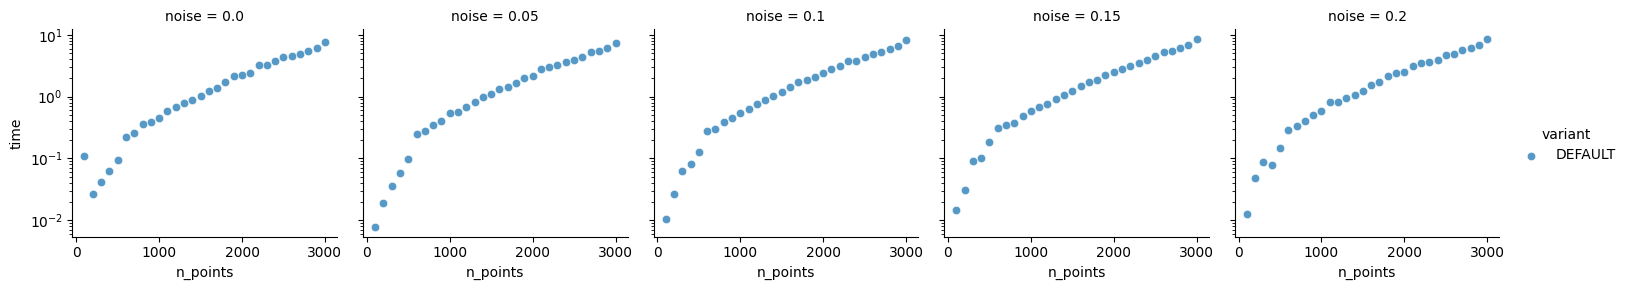

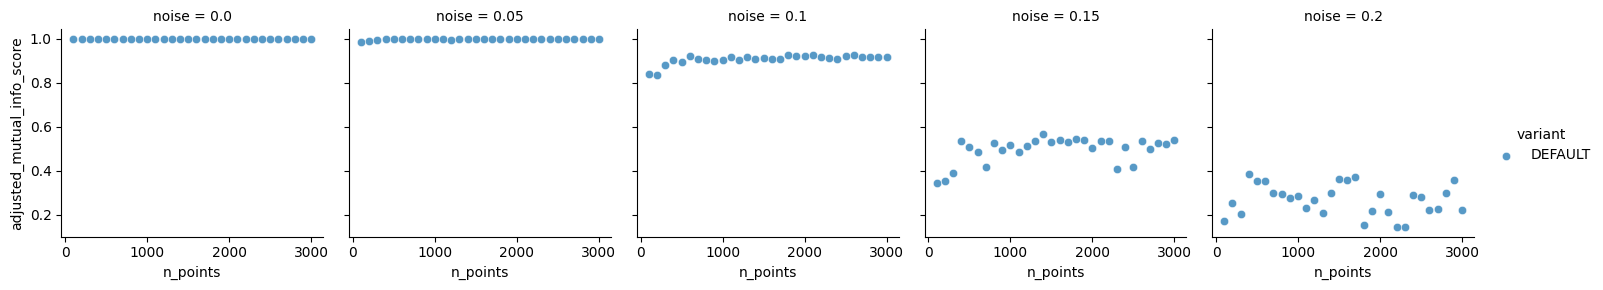

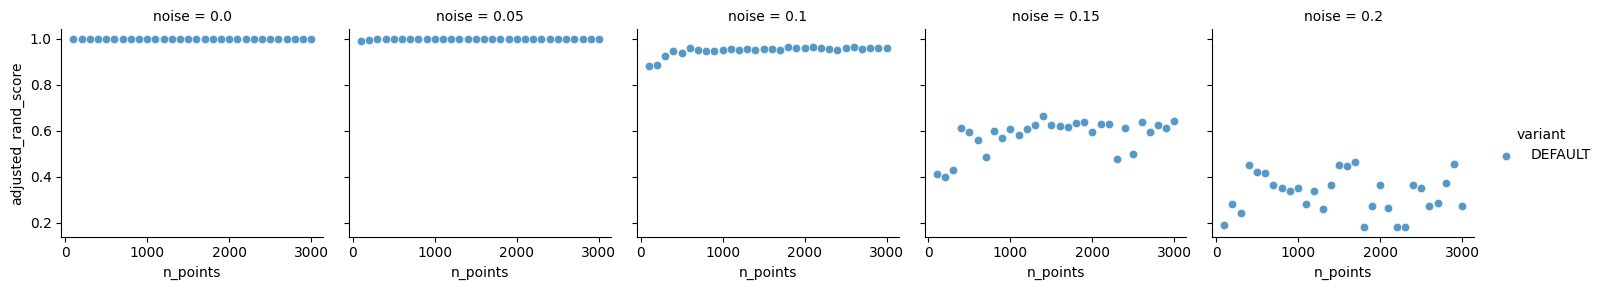

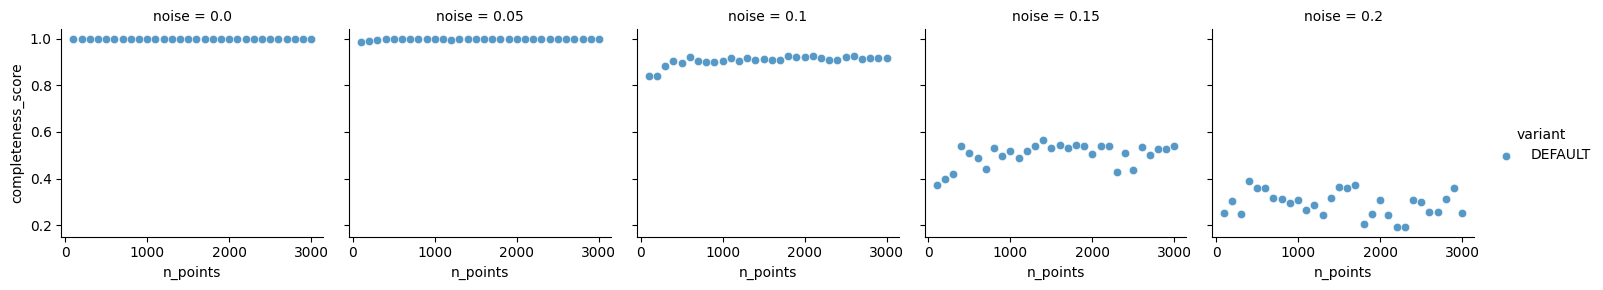

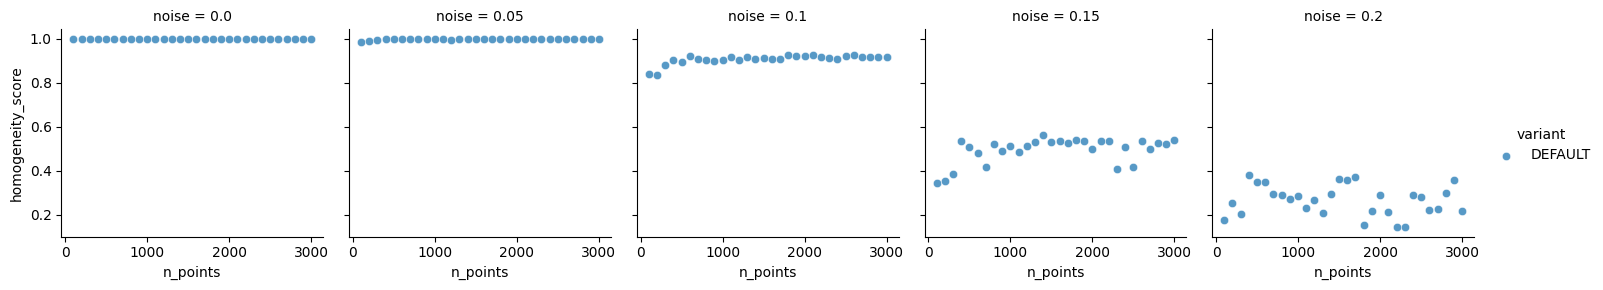

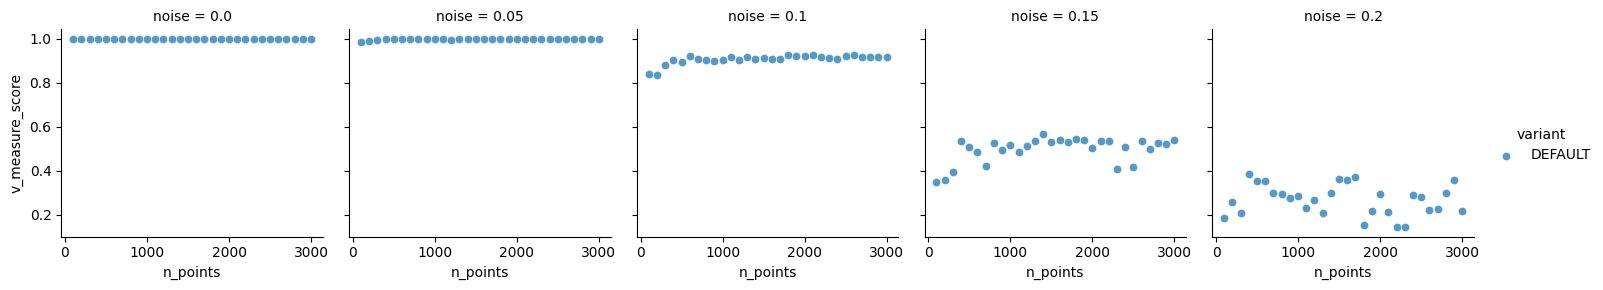

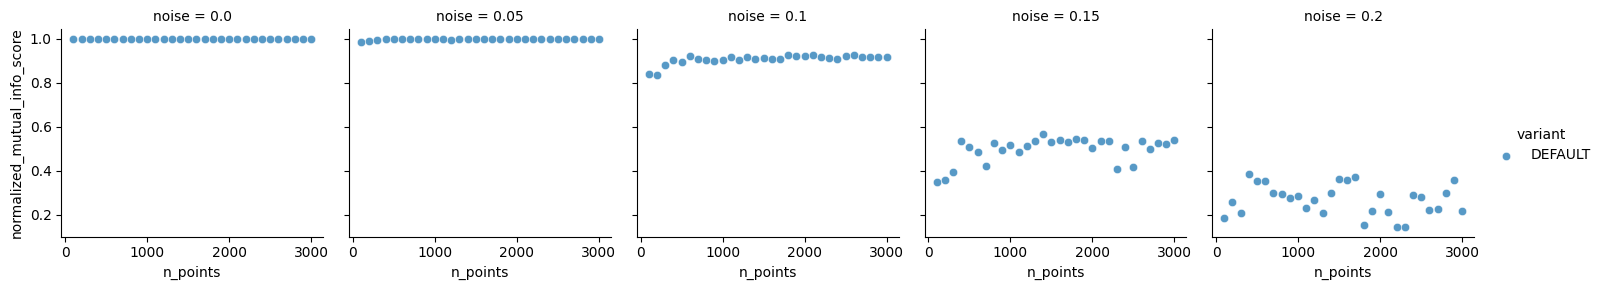

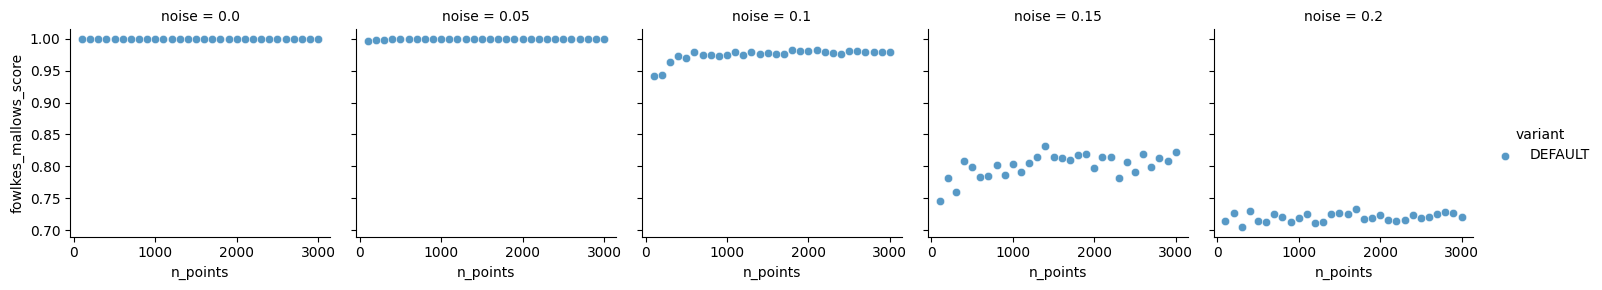

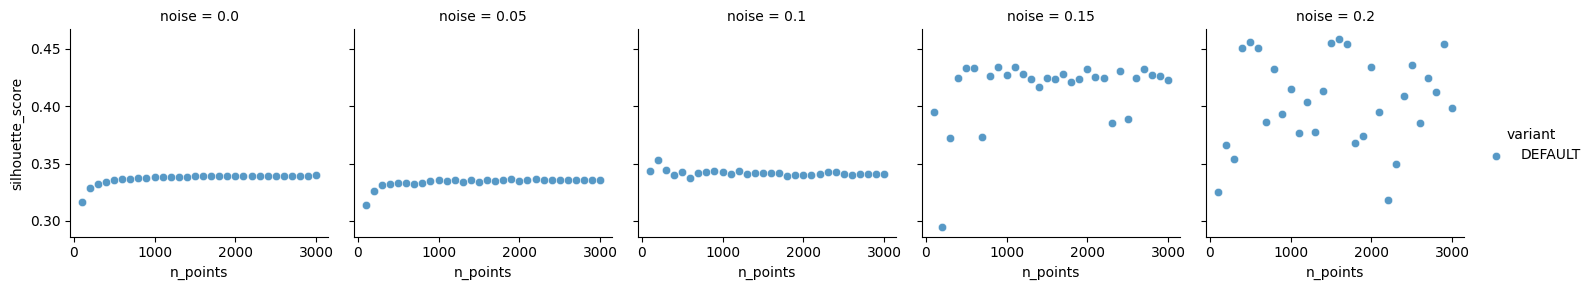

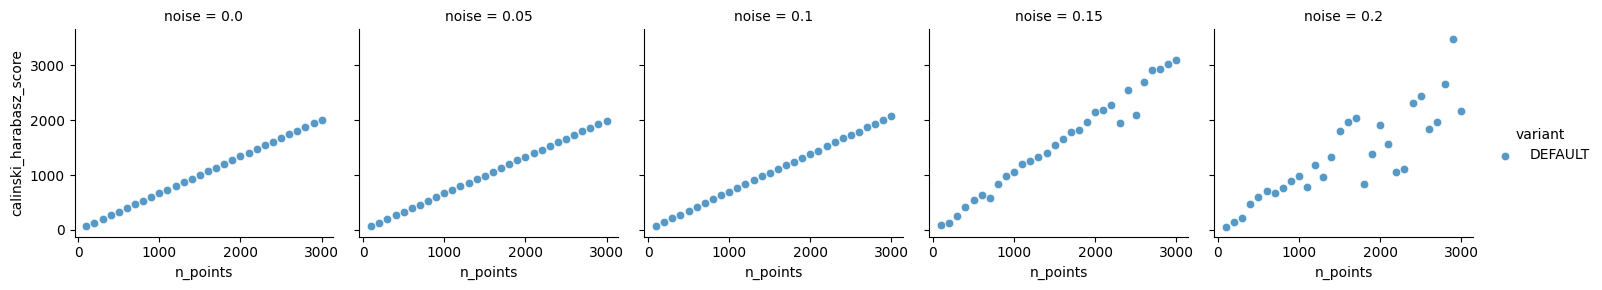

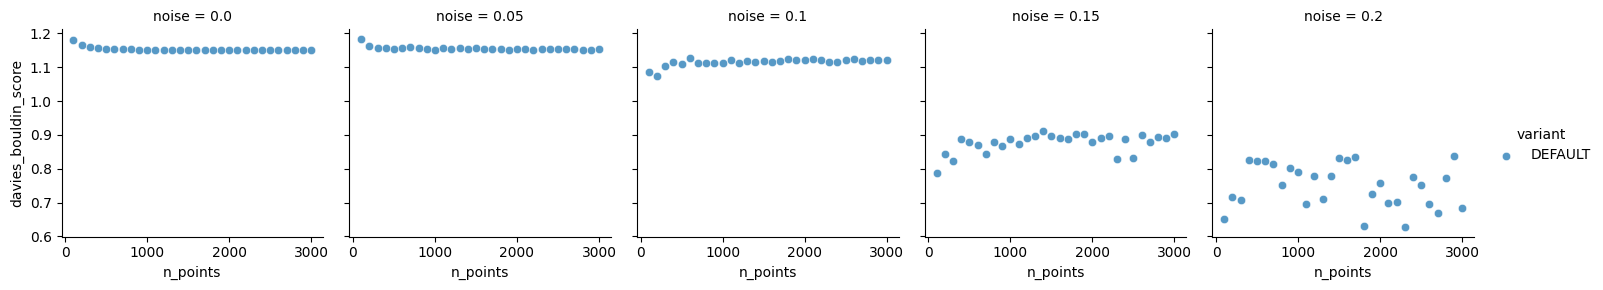

In [40]:
def show_experiment_results(experiment, metrics = DEFAULT_METRICS):

    # filter given experiment, average out over repeats
    experiment_results = results_df[(results_df['experiment'] == experiment)]
    summarised = experiment_results.groupby(['noise', 'variant', 'n_points']).mean(True).reset_index()

    # for each metric to plot, show a (single row) facetgrid 
    for metric in metrics:
        g = sns.FacetGrid(summarised, col="noise", hue='variant')
        g.map_dataframe(sns.scatterplot, "n_points", metric, alpha = 0.75)
        g.add_legend()
        if metric == 'time':
            plt.yscale('log')
        plt.show()

show_experiment_results('DEFAULT')

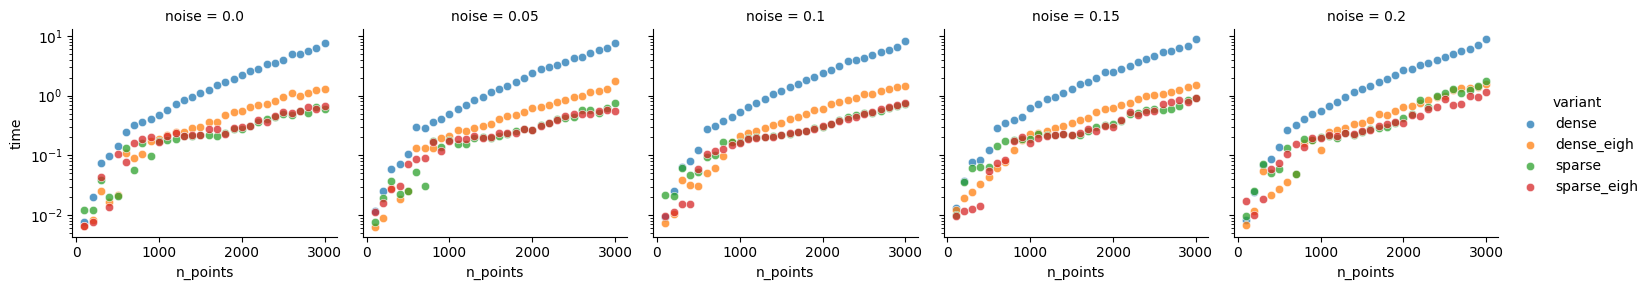

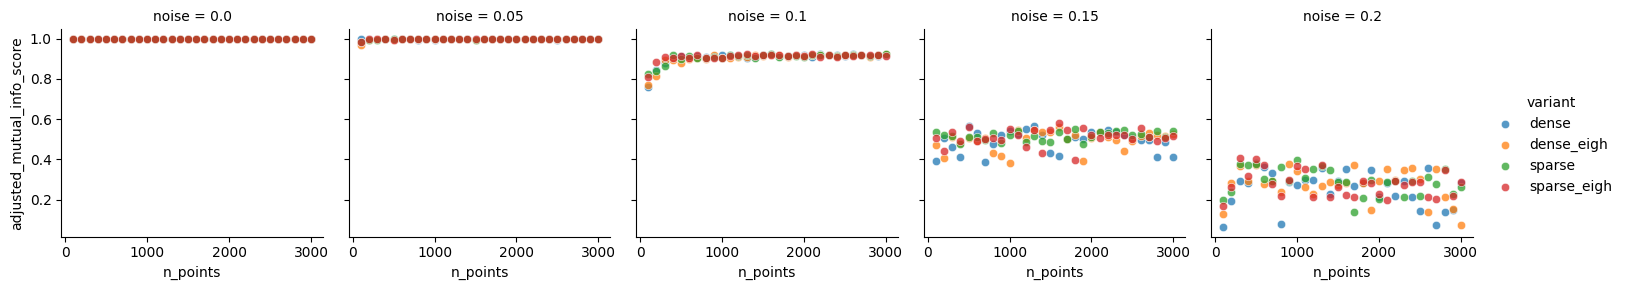

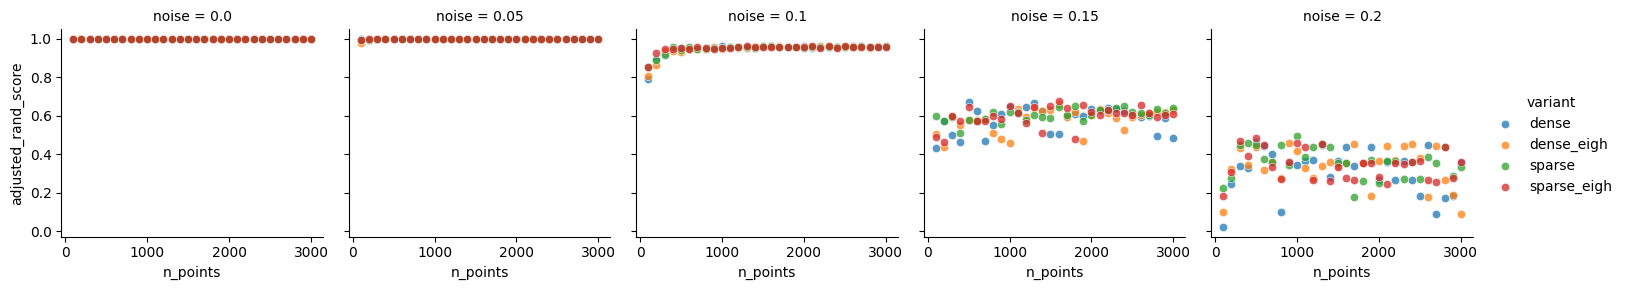

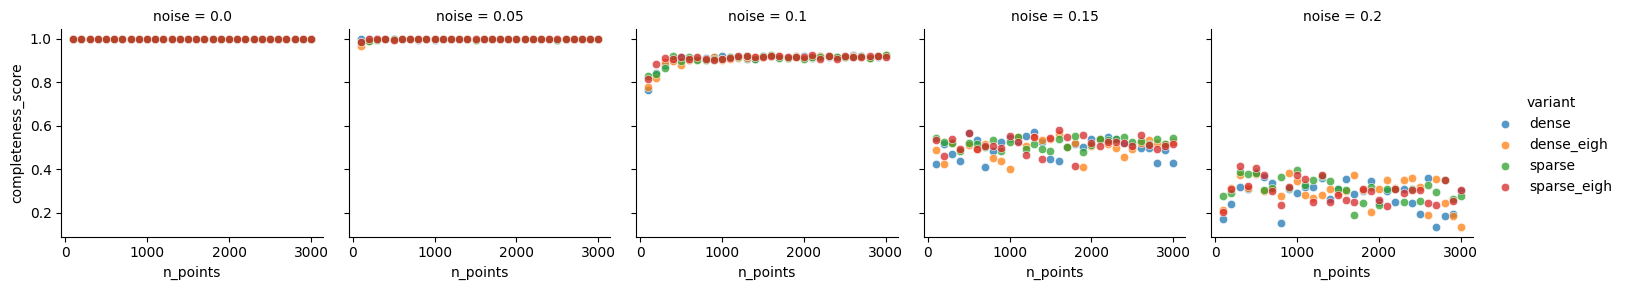

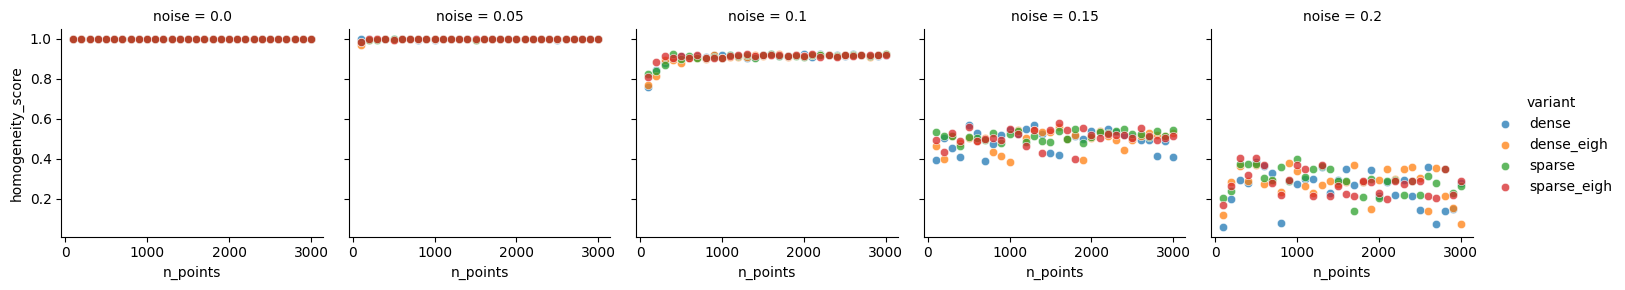

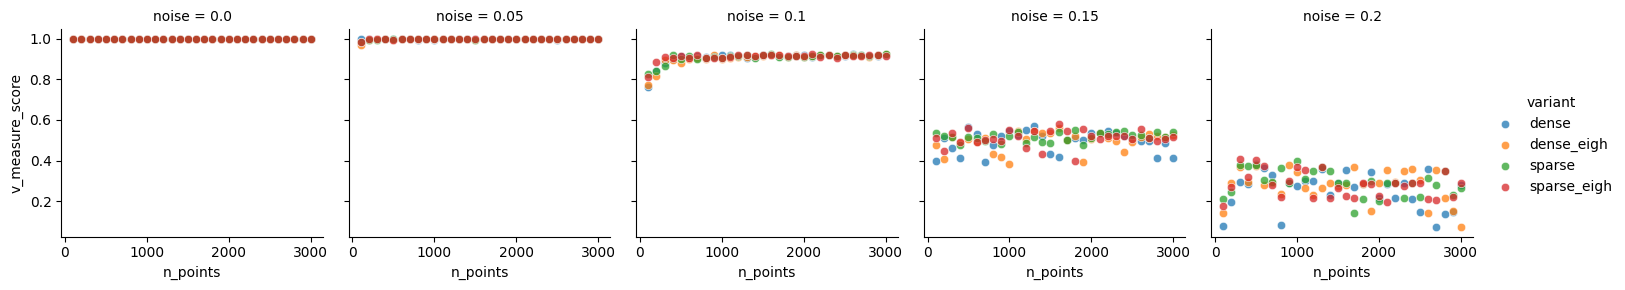

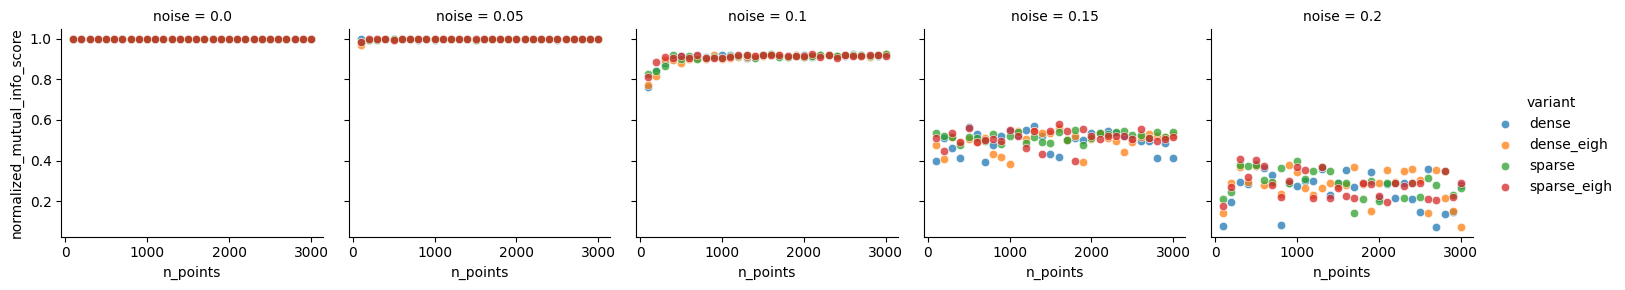

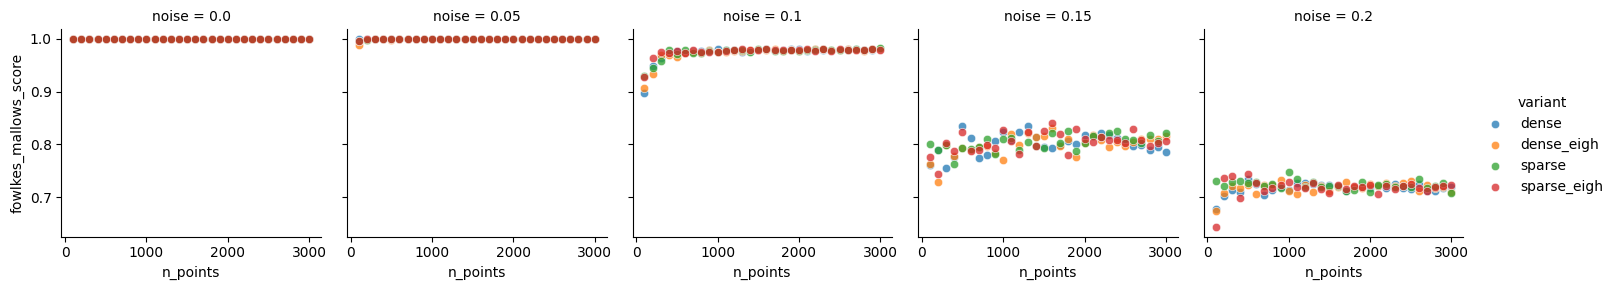

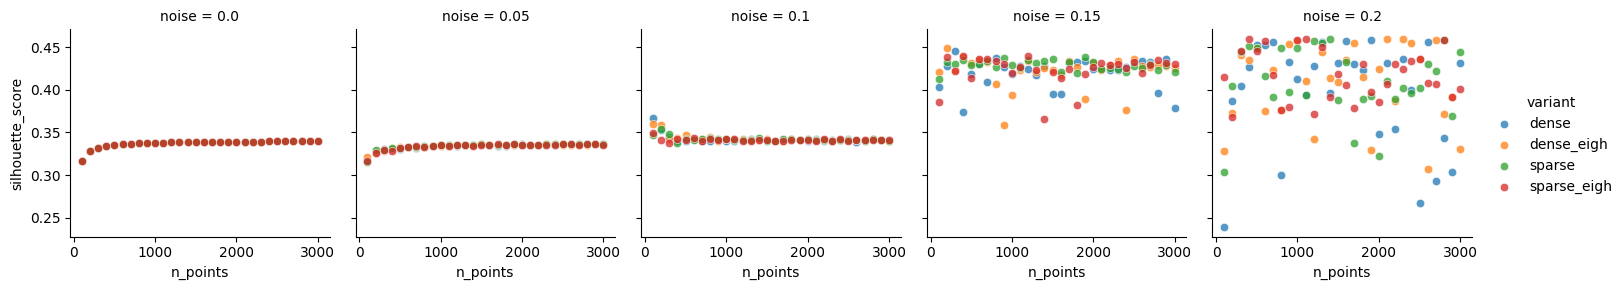

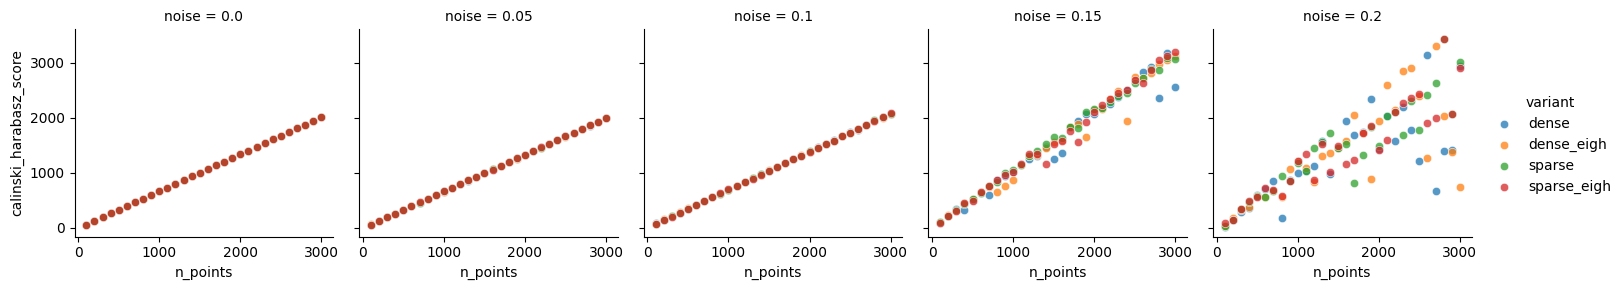

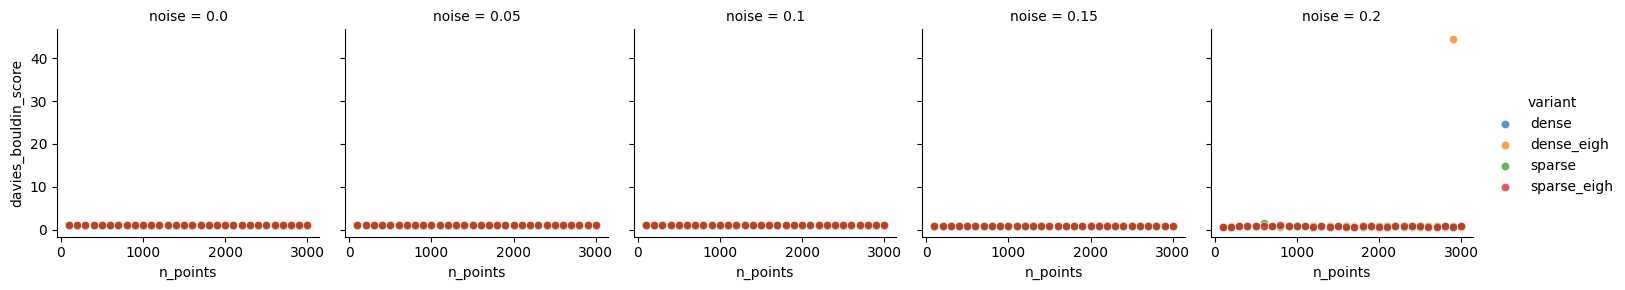

In [41]:
show_experiment_results('Decomposition')

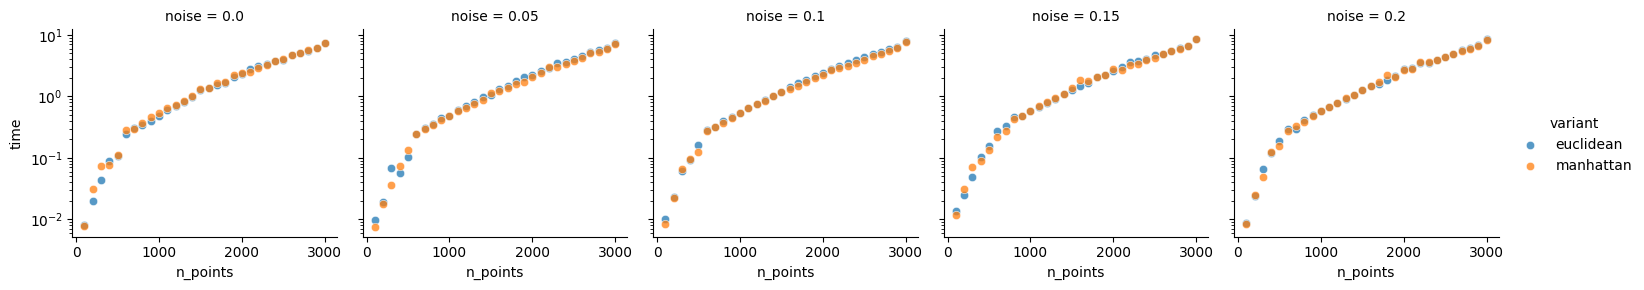

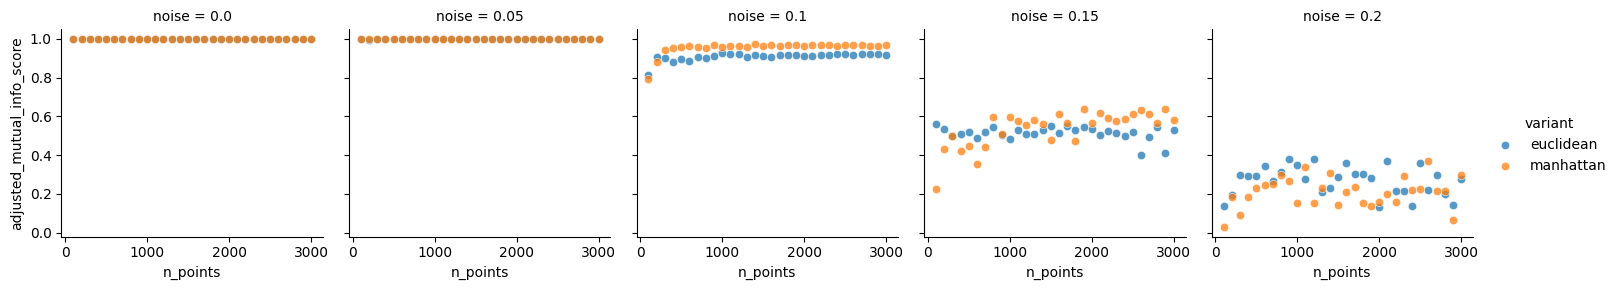

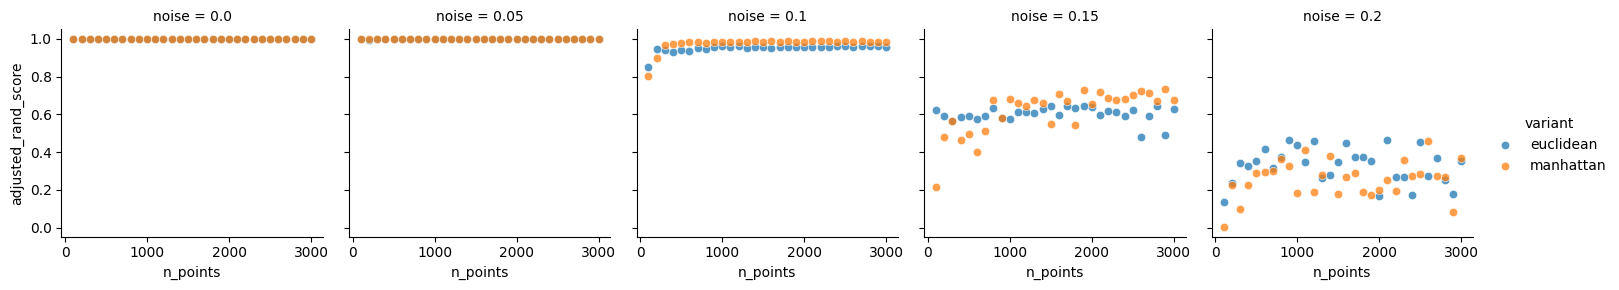

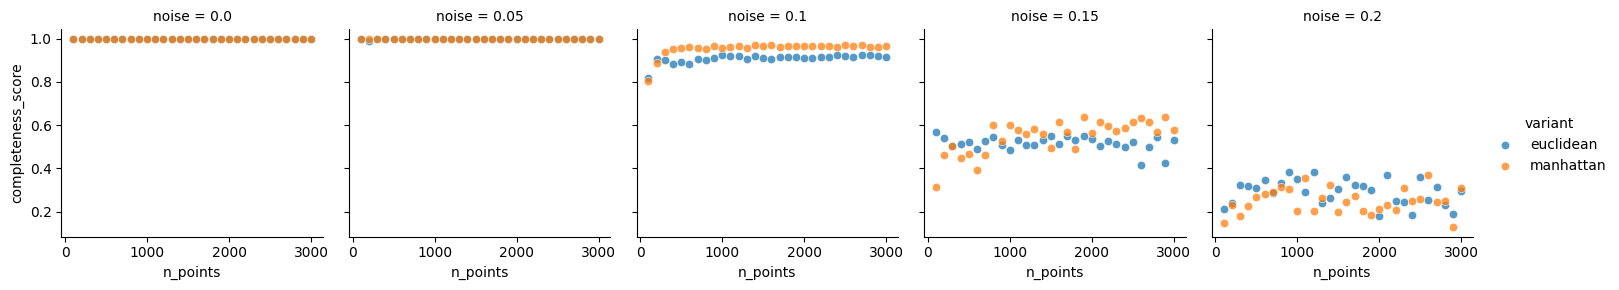

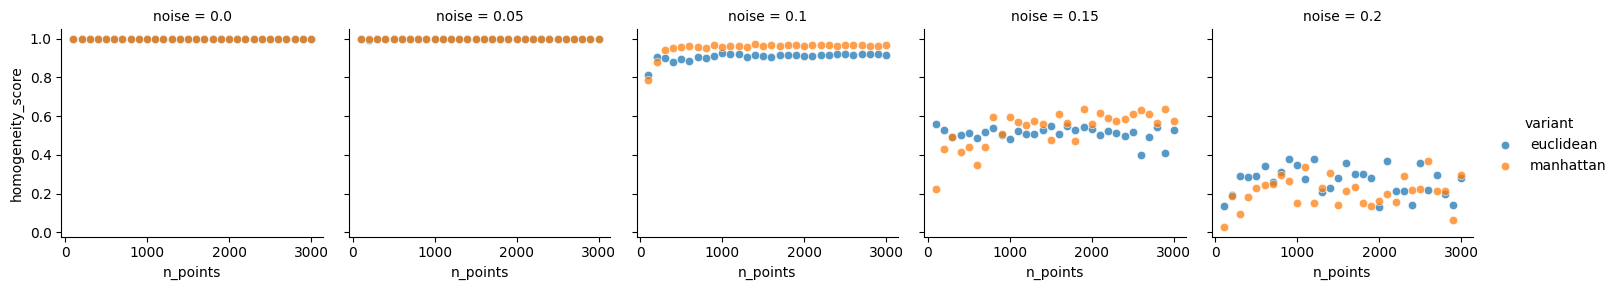

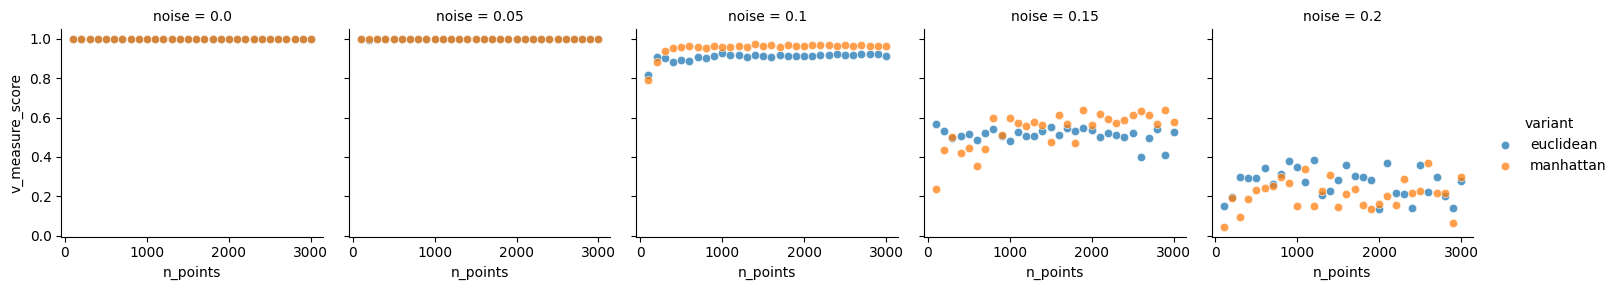

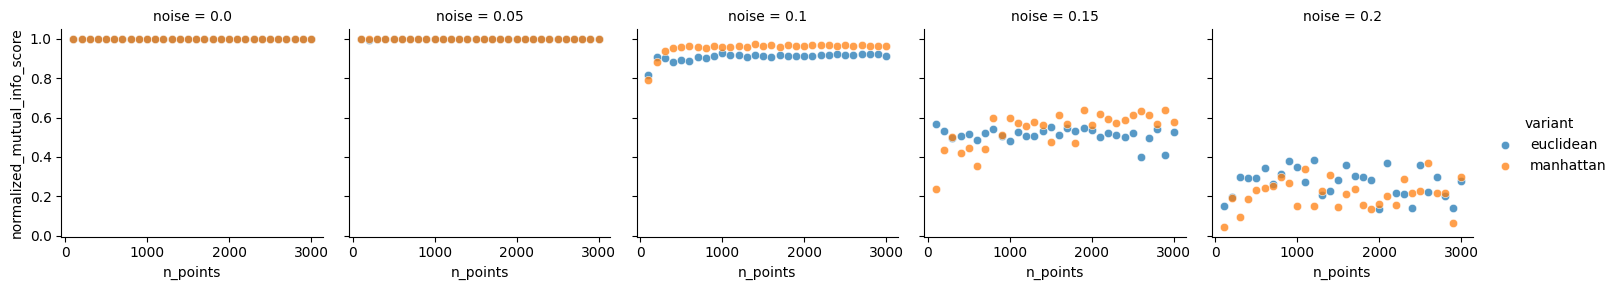

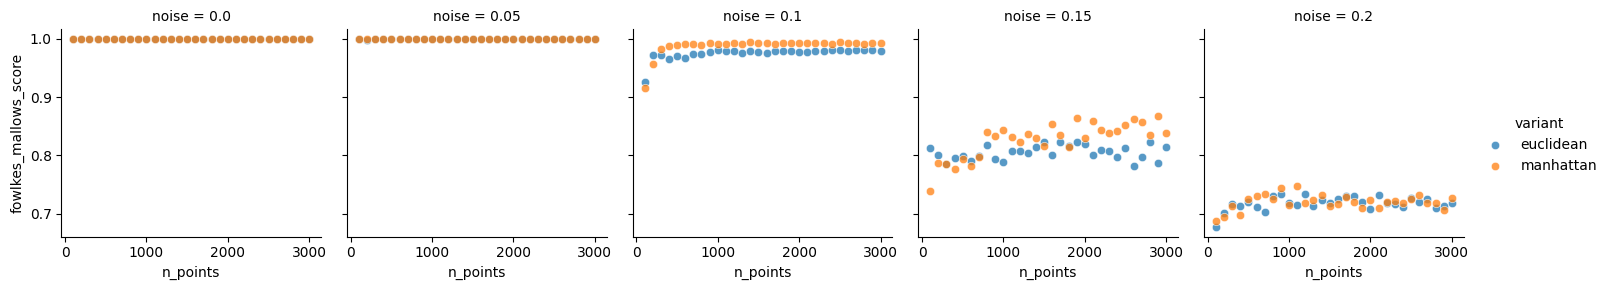

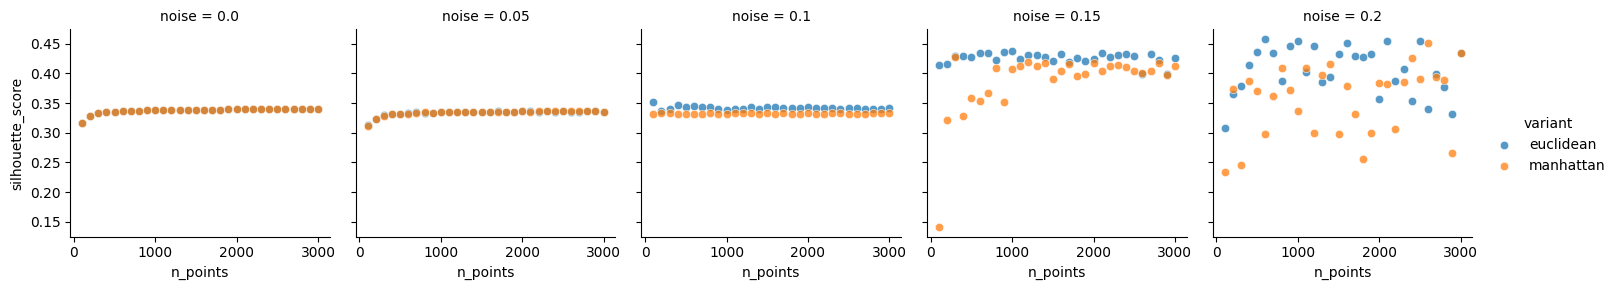

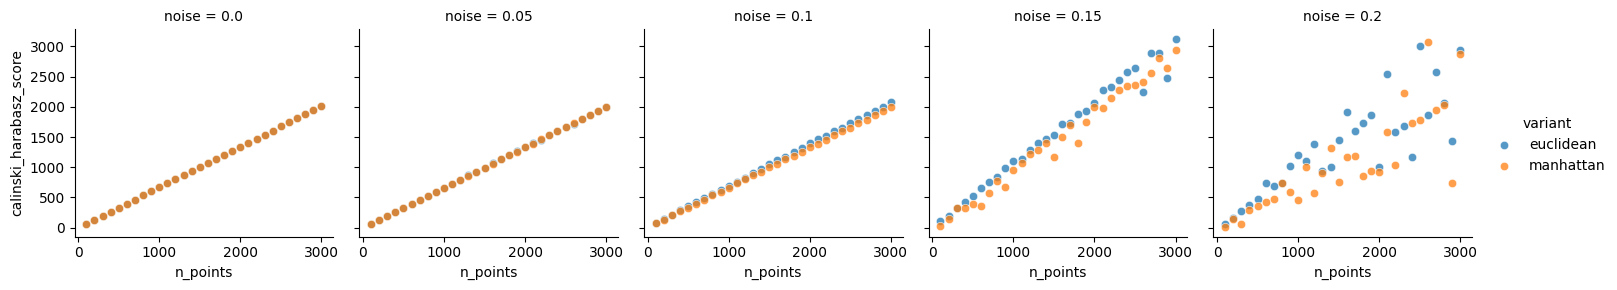

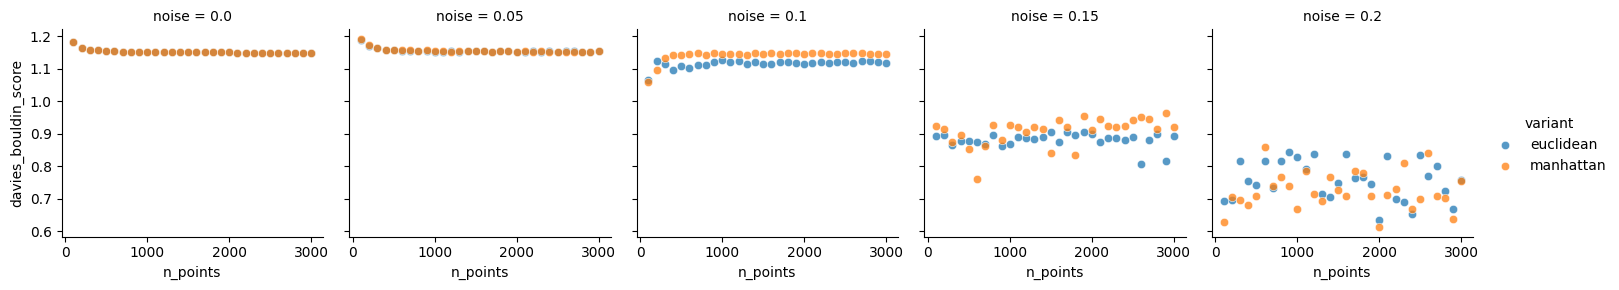

In [42]:
show_experiment_results('Affinity')

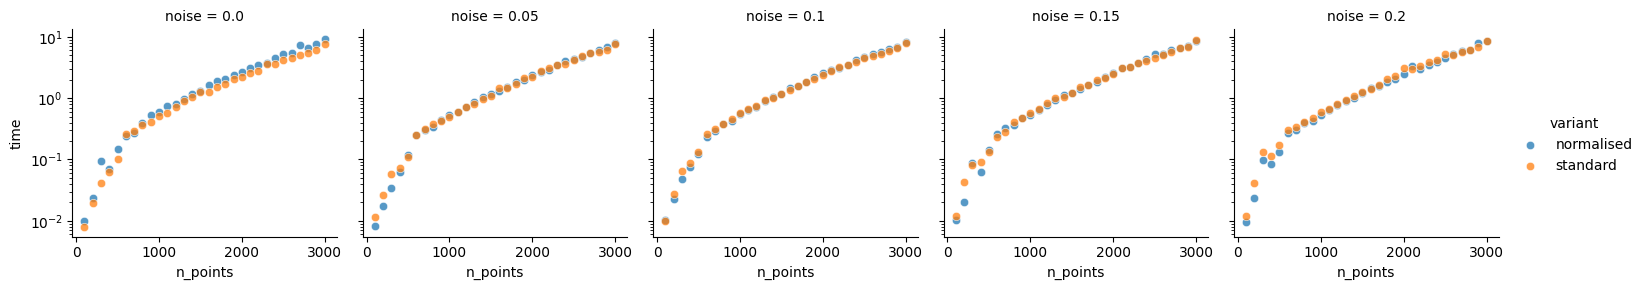

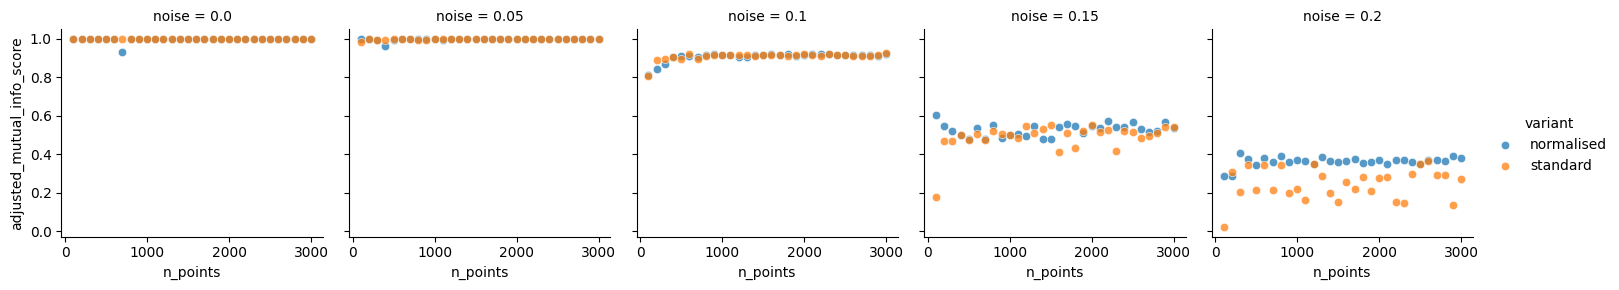

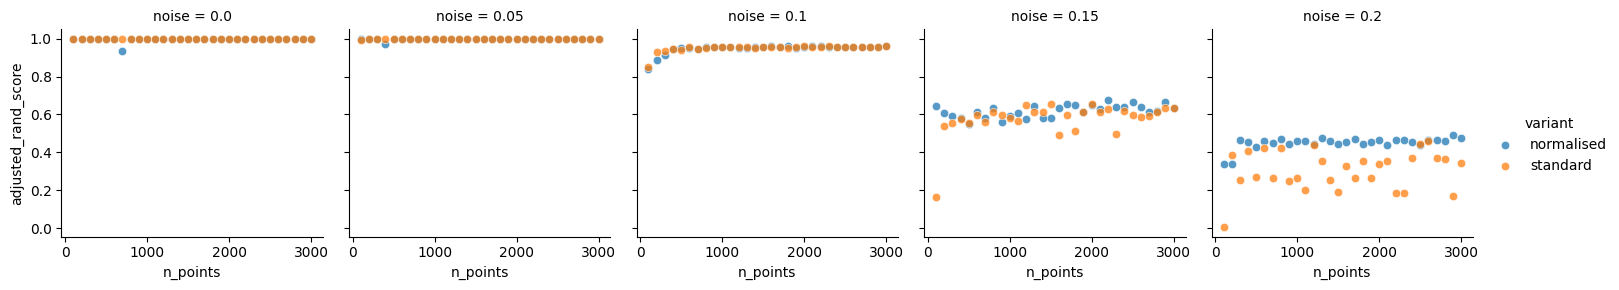

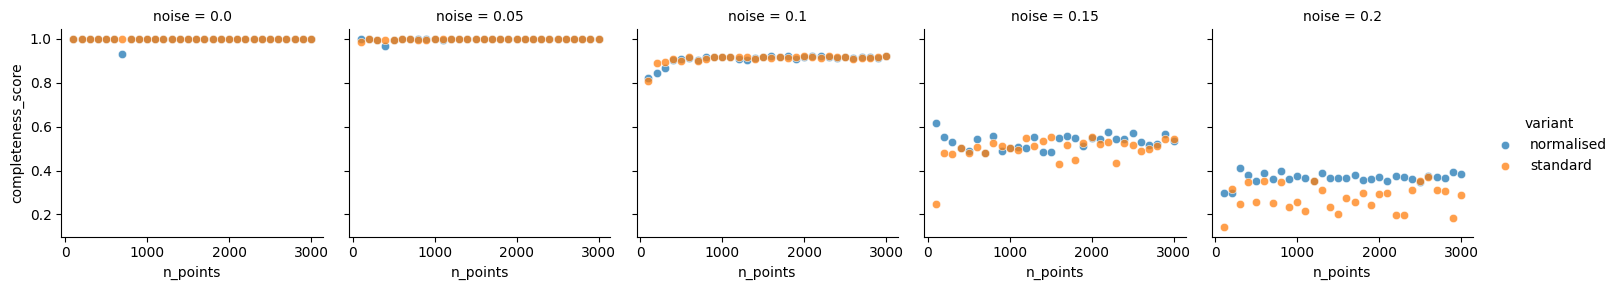

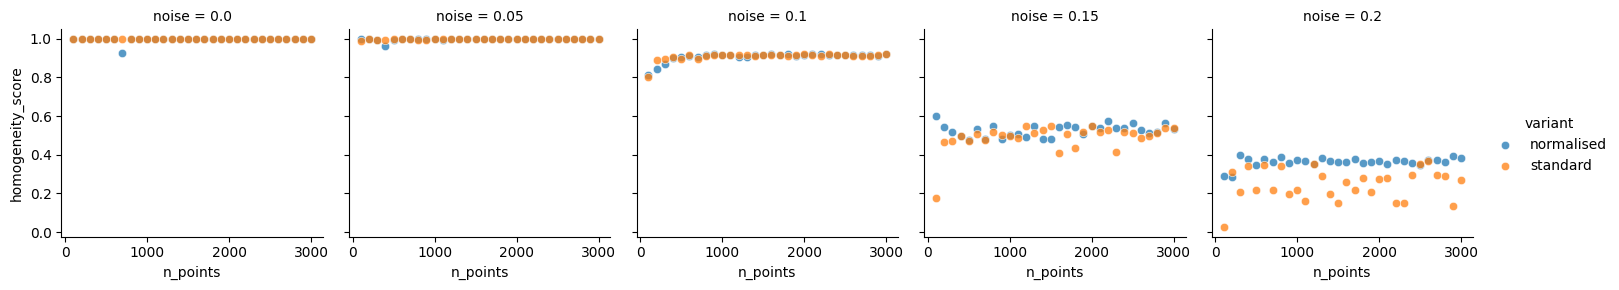

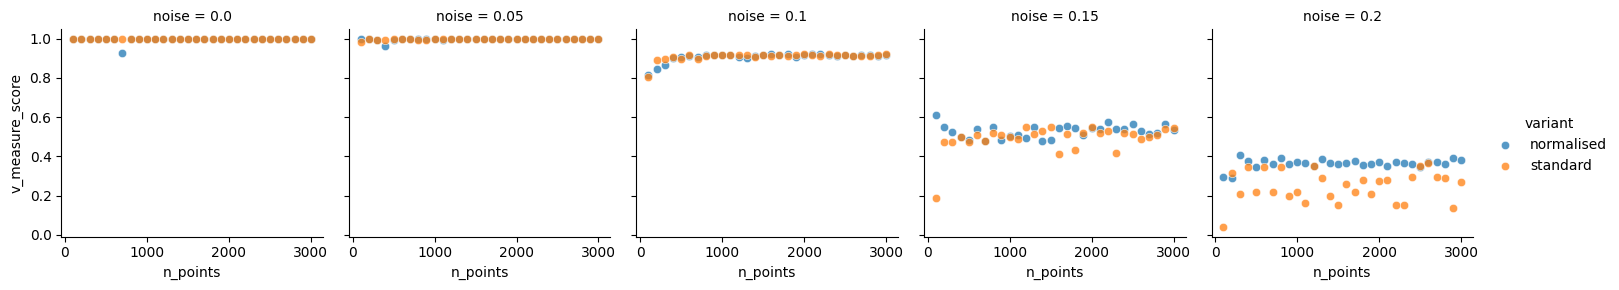

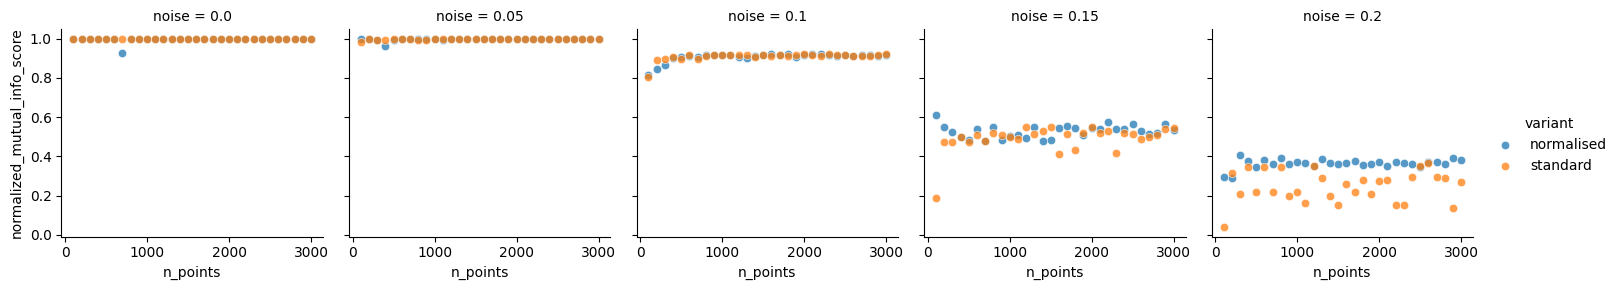

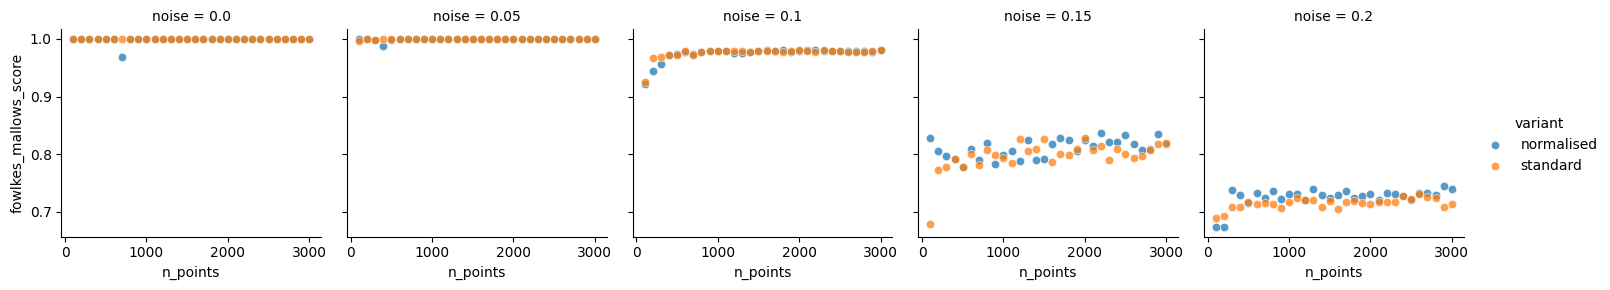

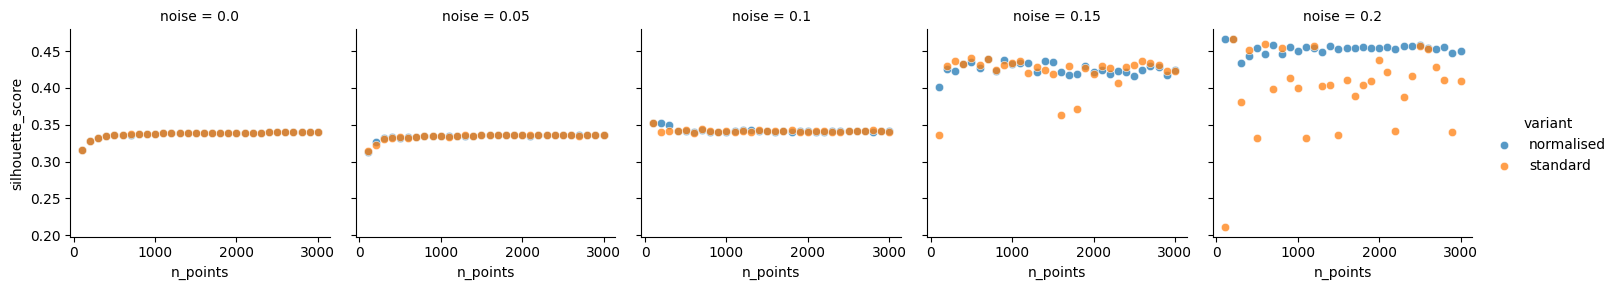

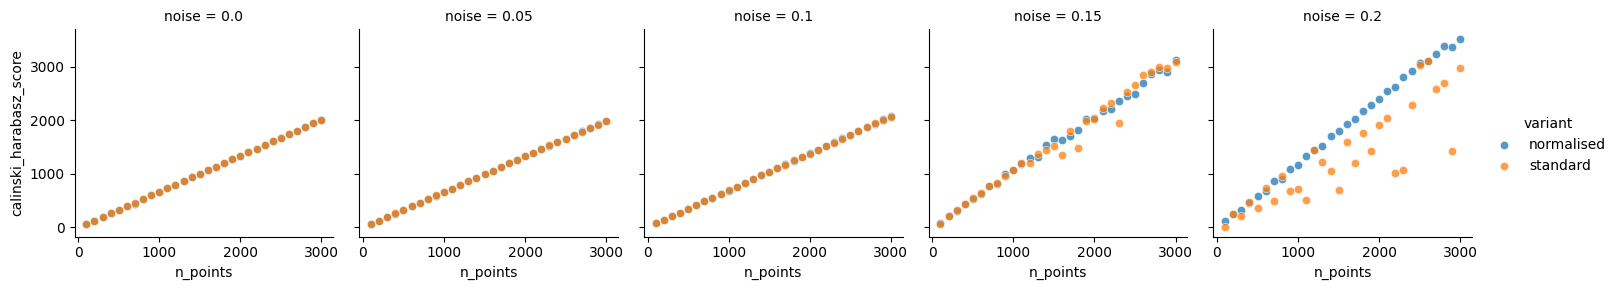

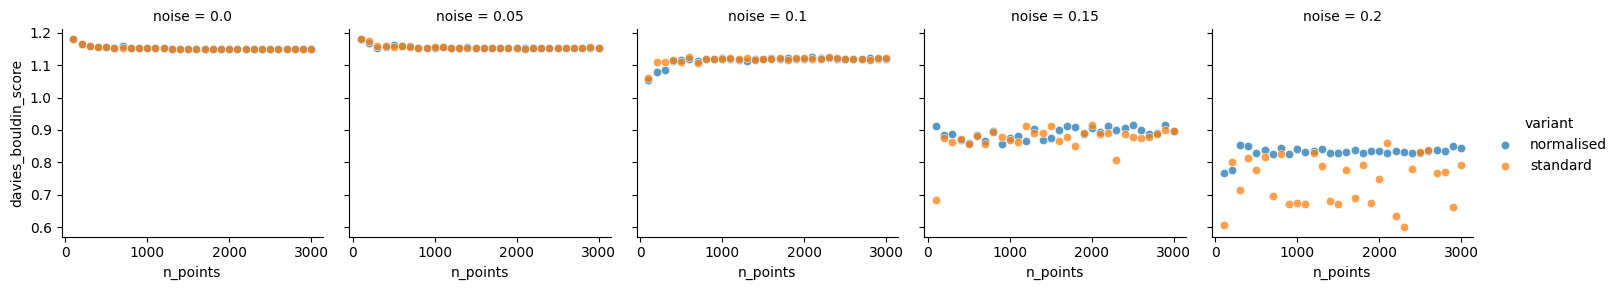

In [43]:
show_experiment_results('Laplacian')

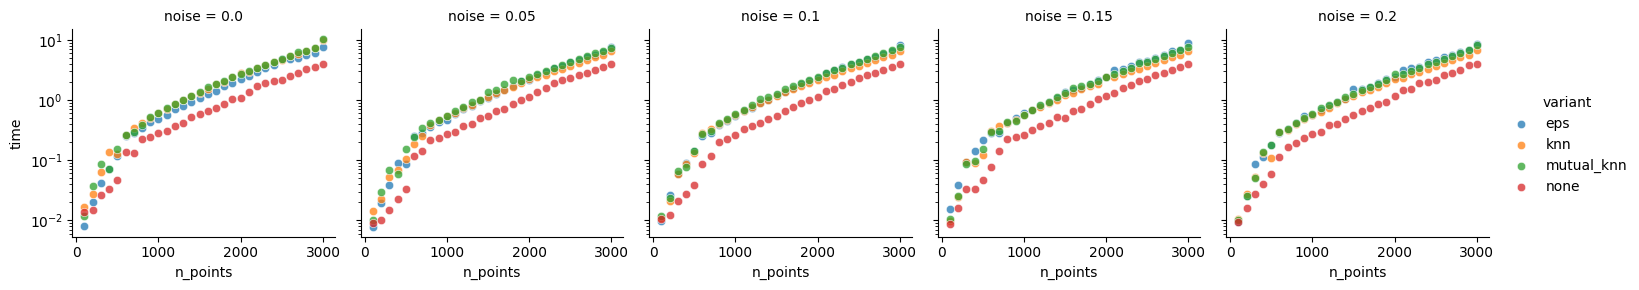

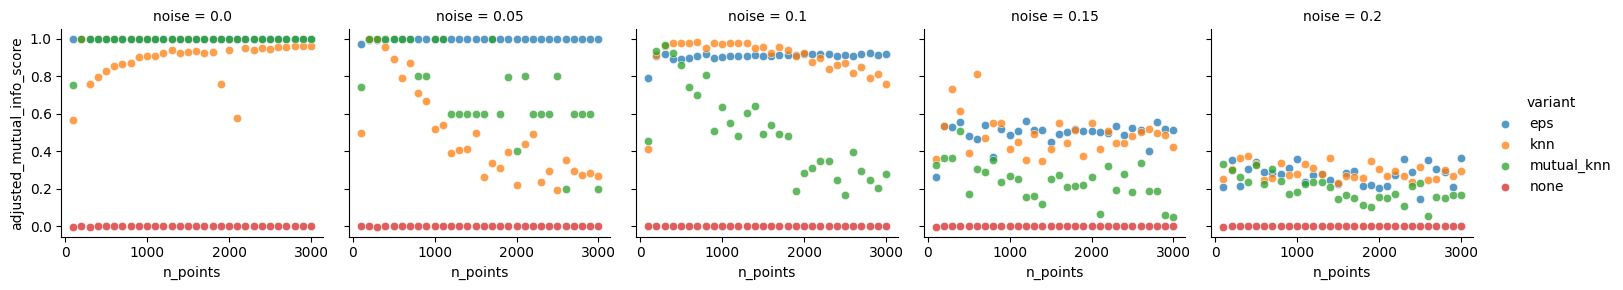

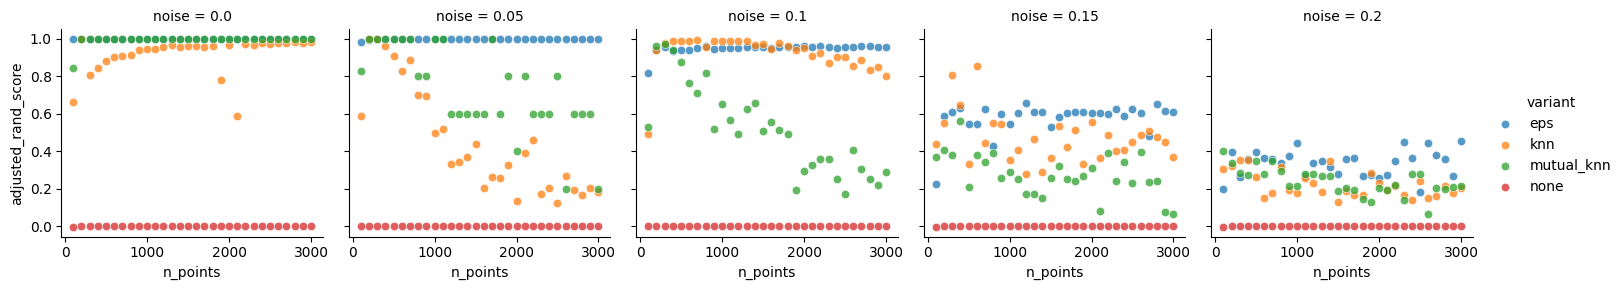

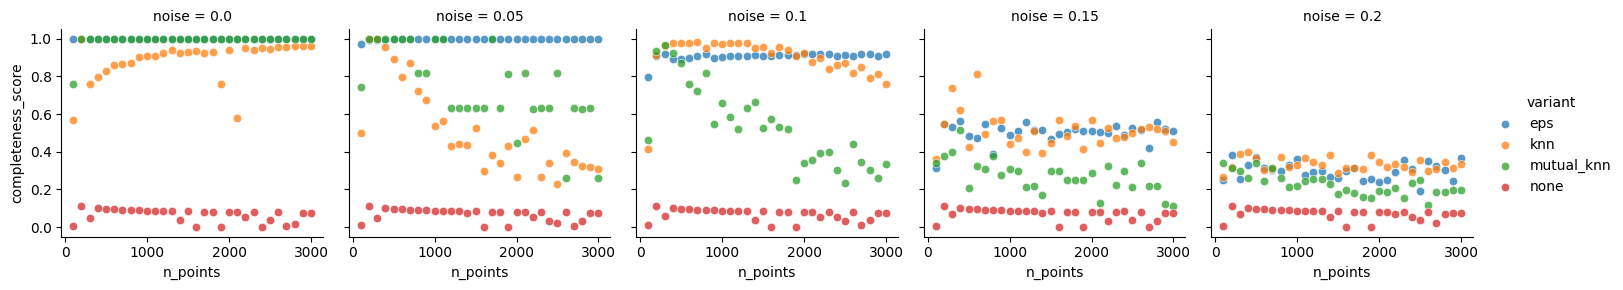

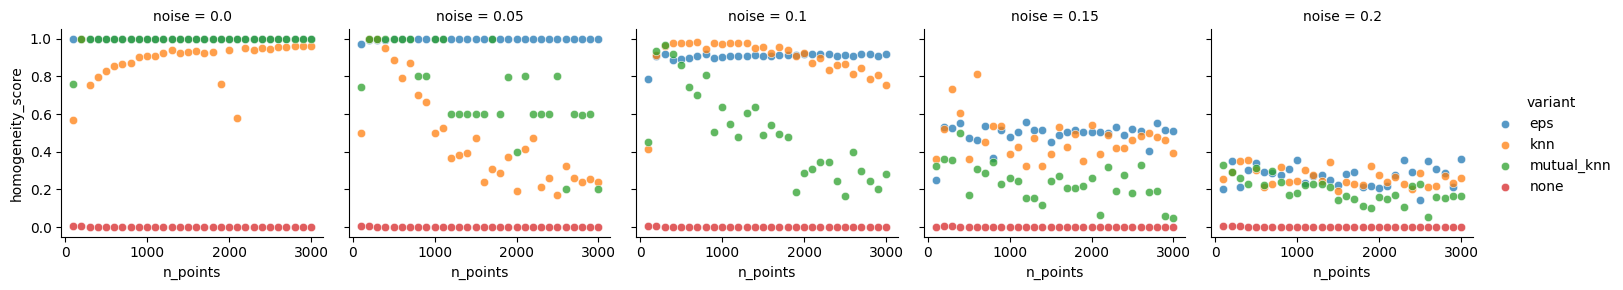

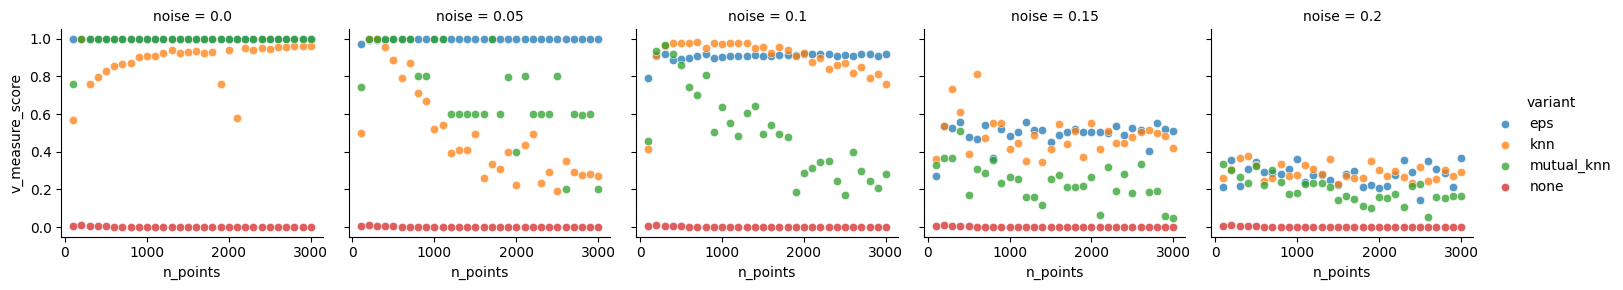

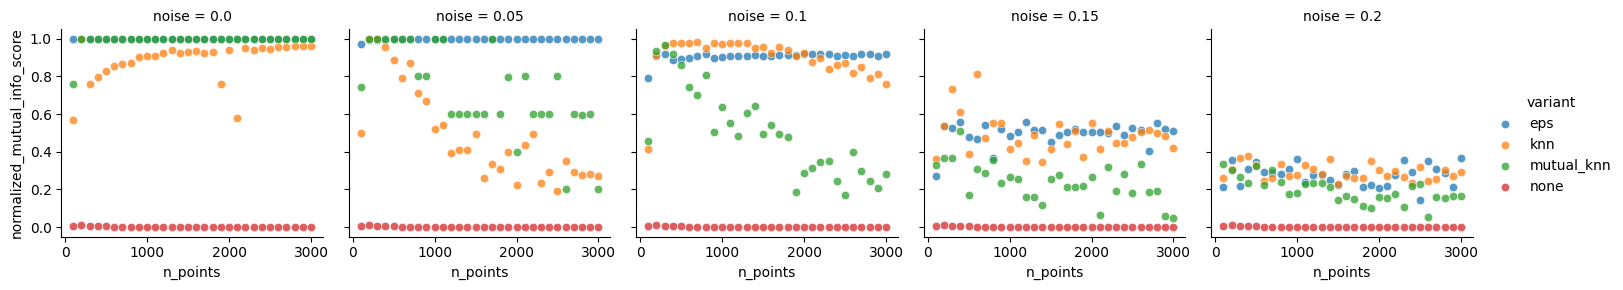

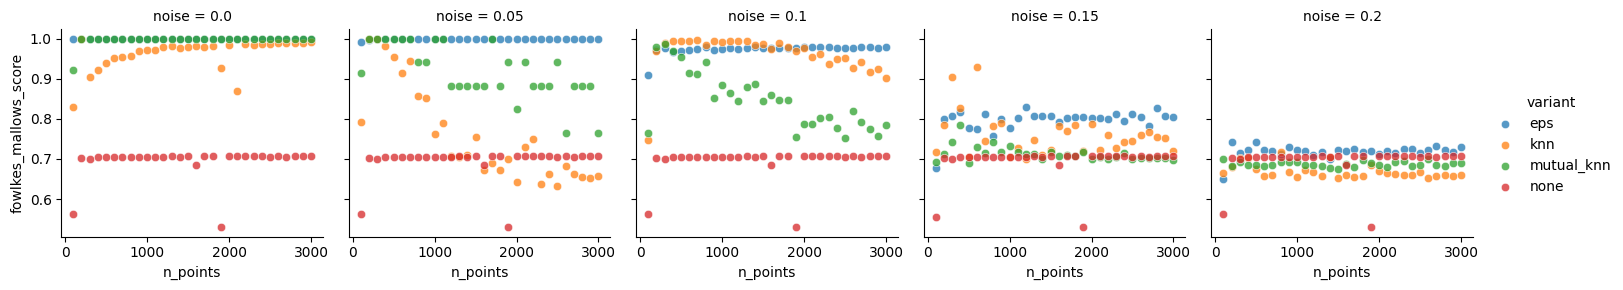

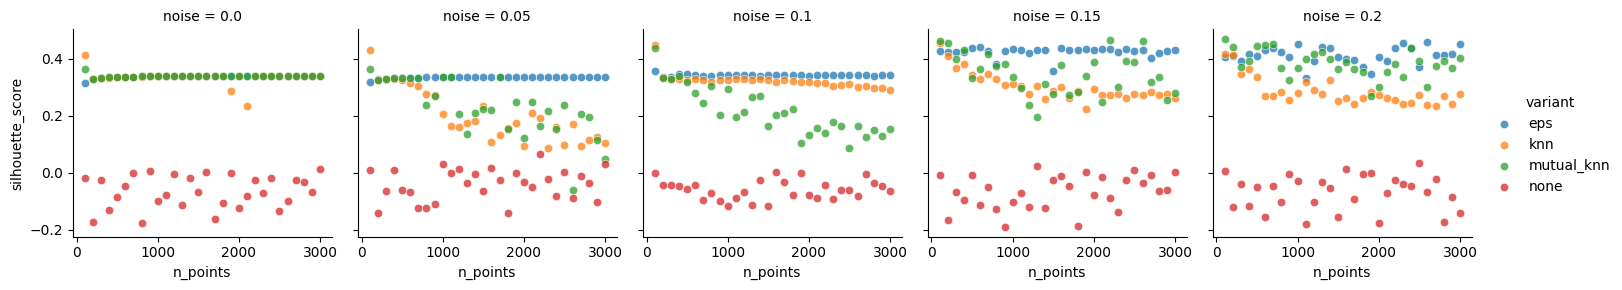

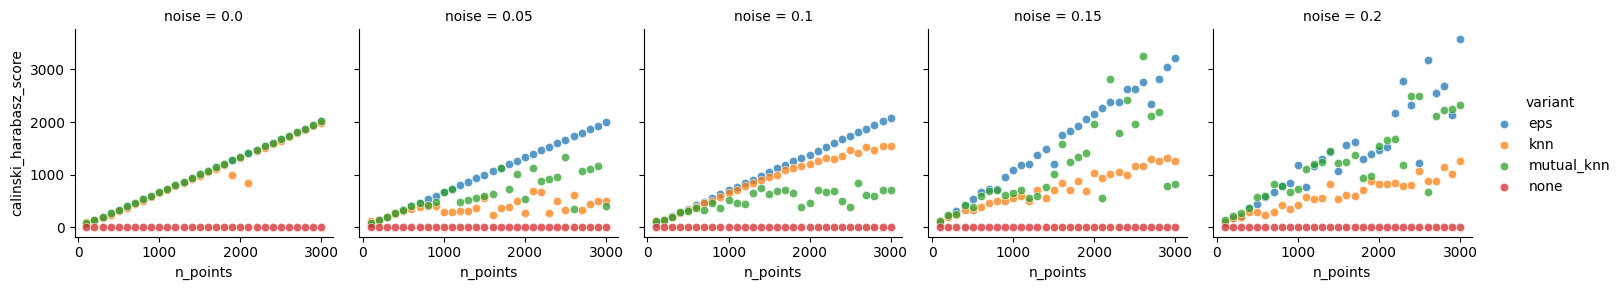

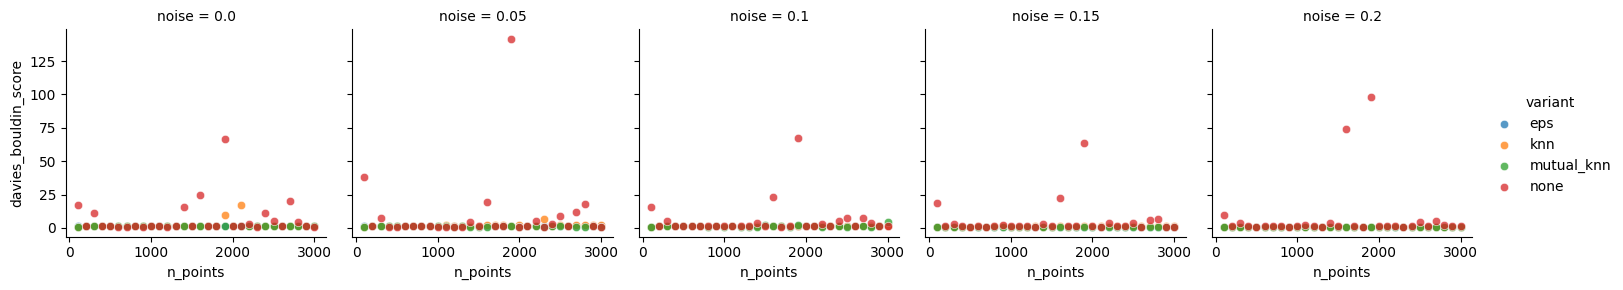

In [44]:
show_experiment_results('Refinement')

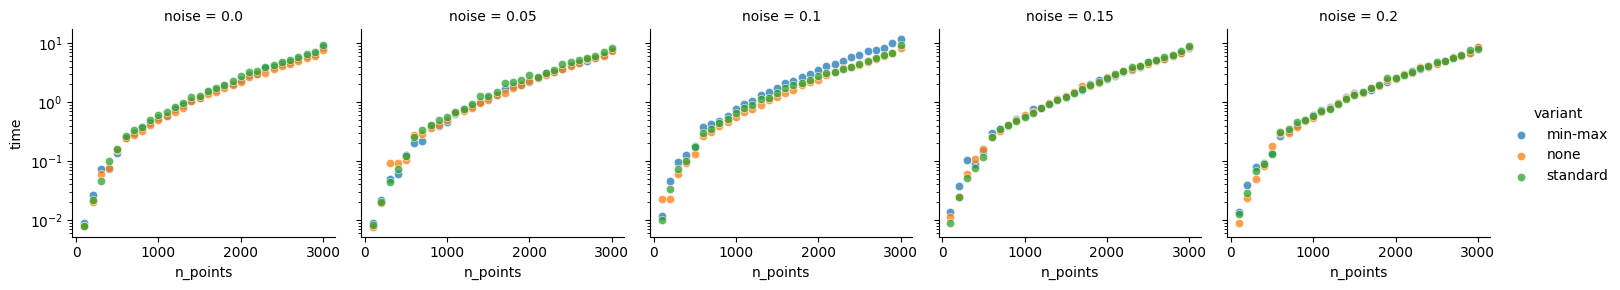

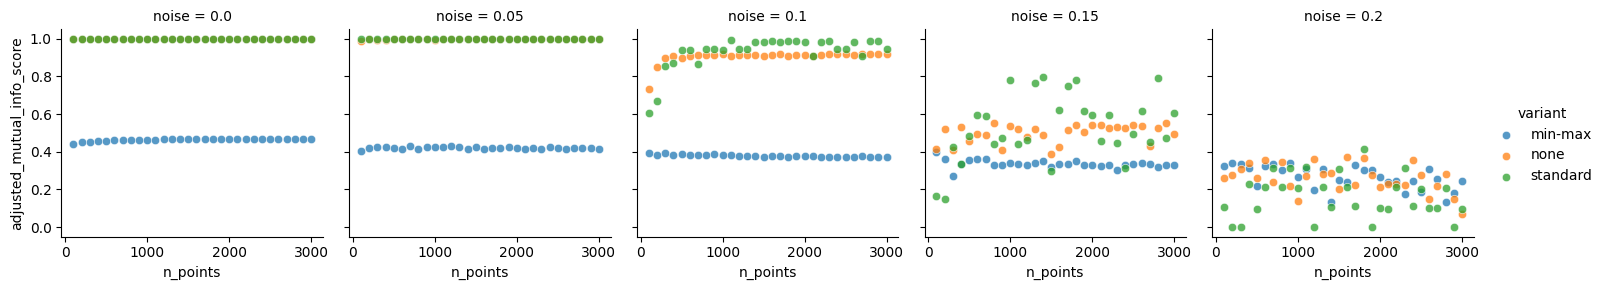

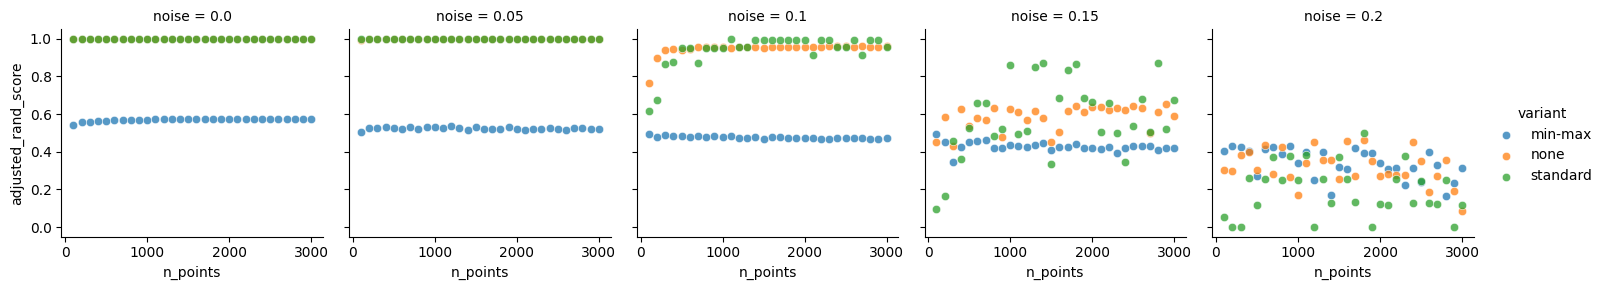

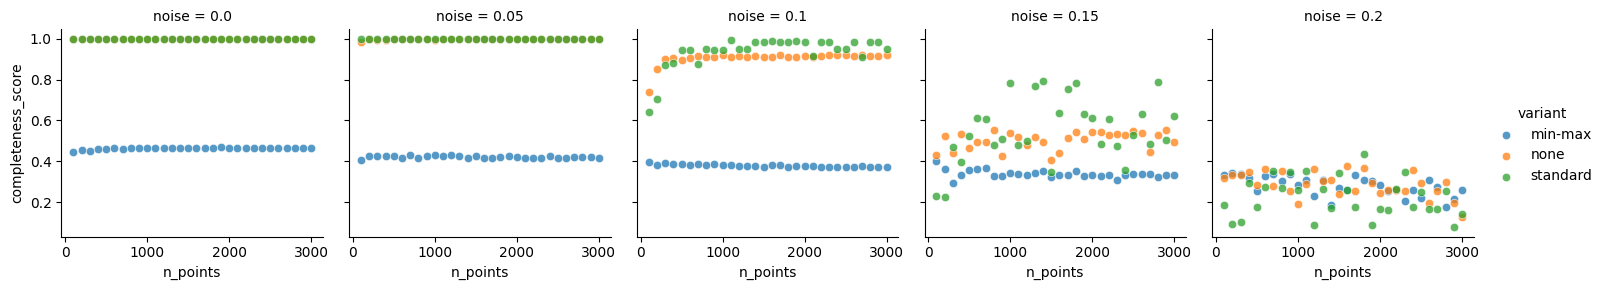

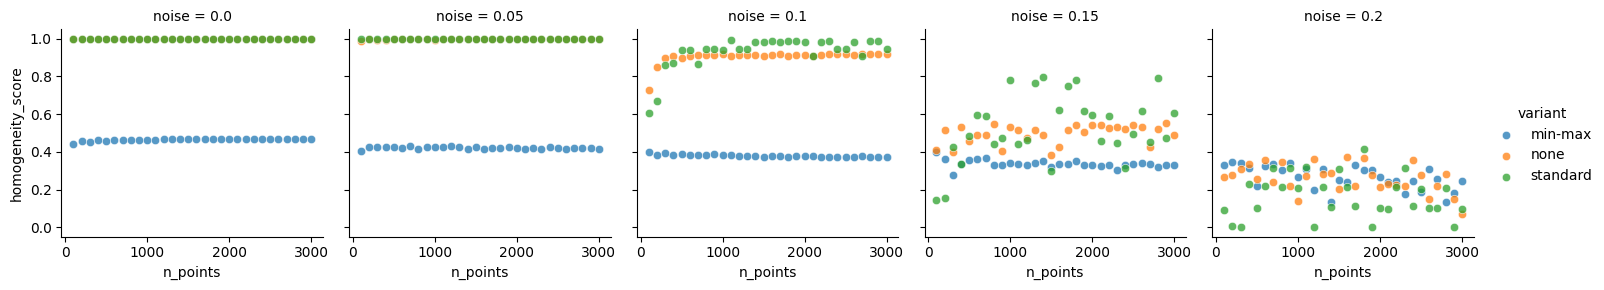

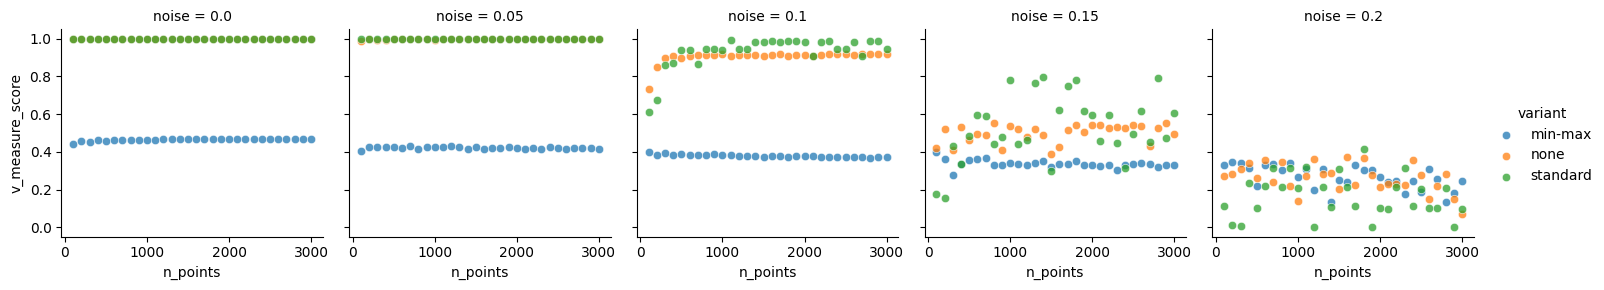

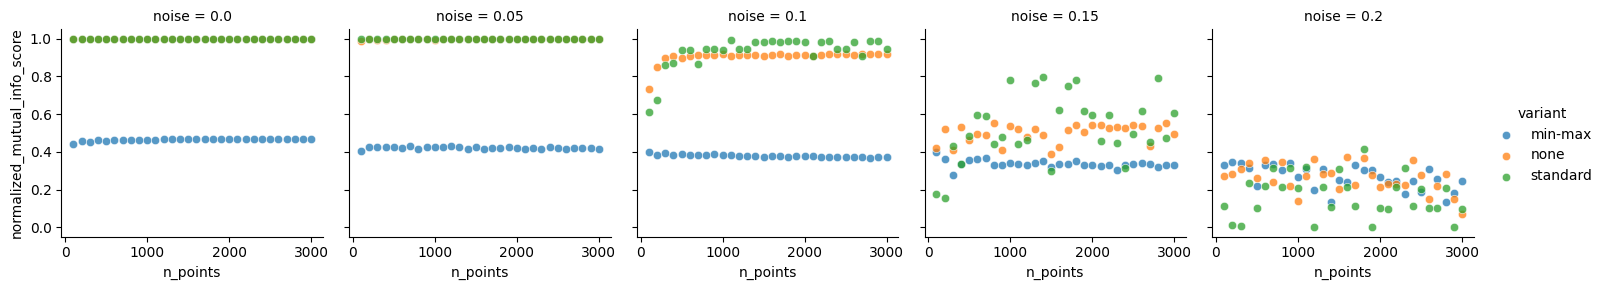

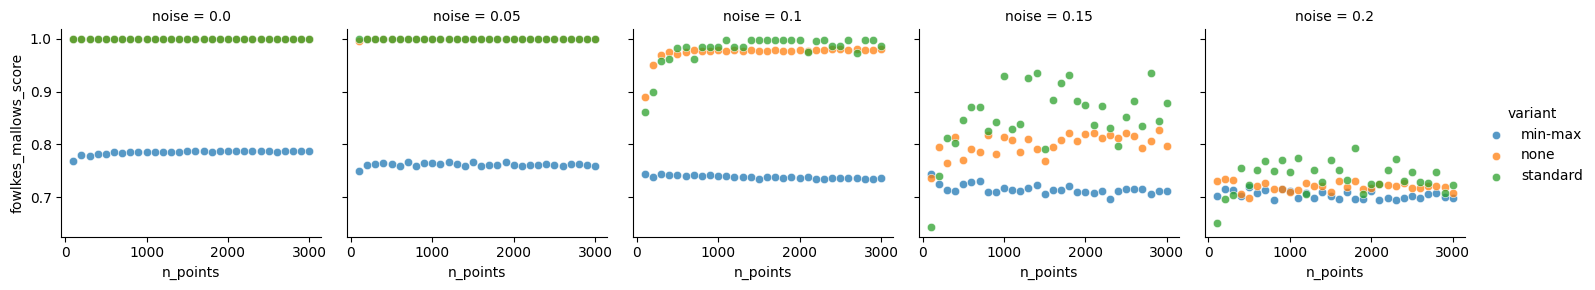

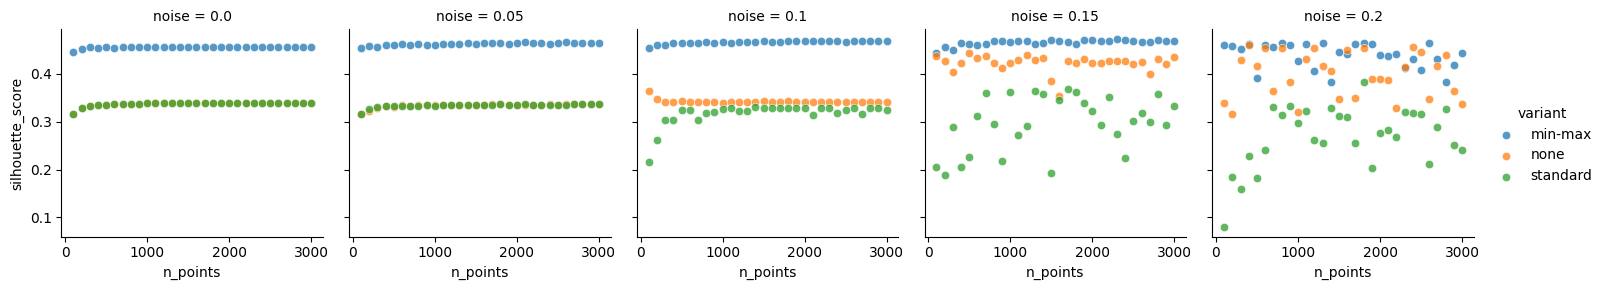

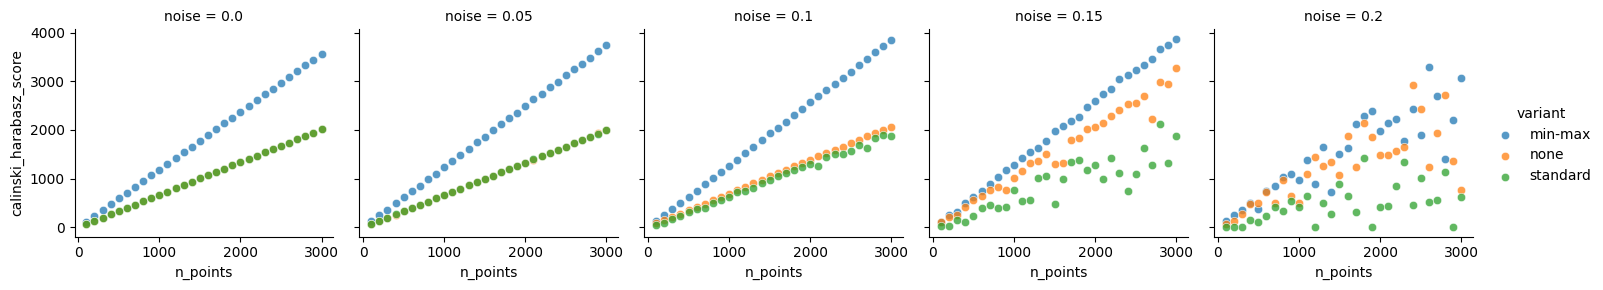

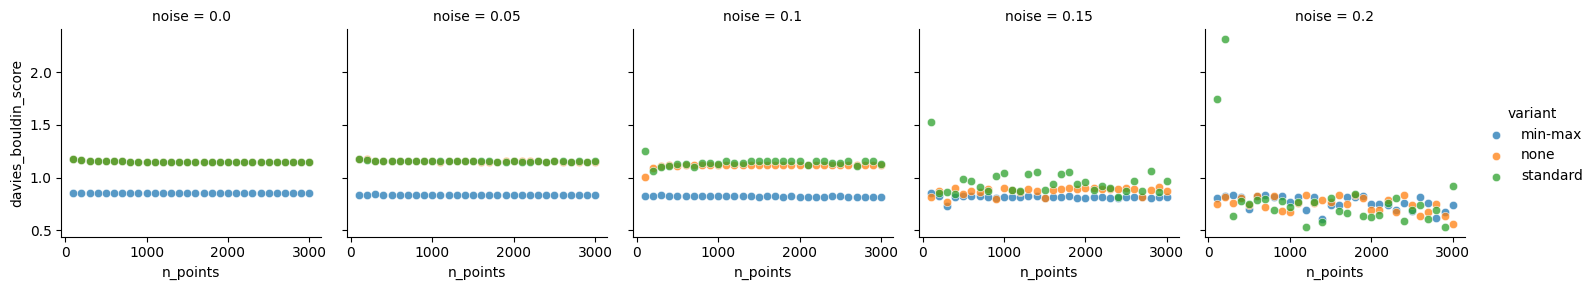

In [45]:
show_experiment_results('Standardisation')

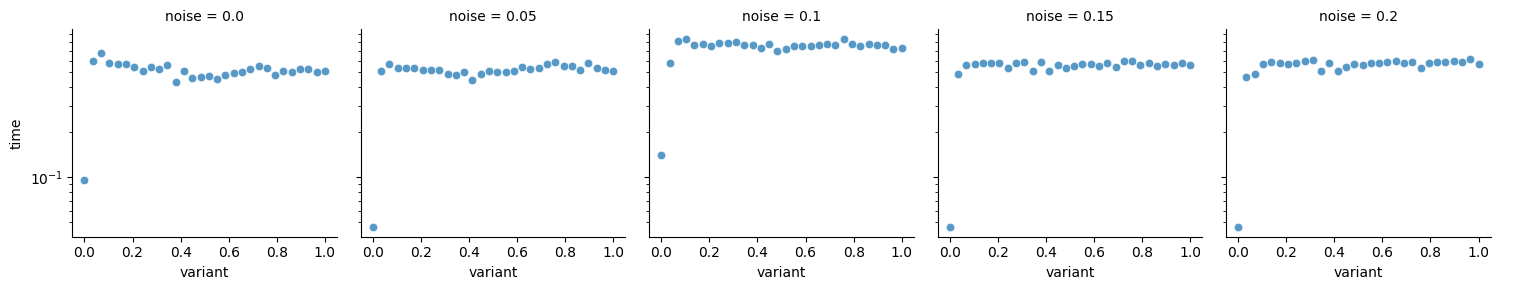

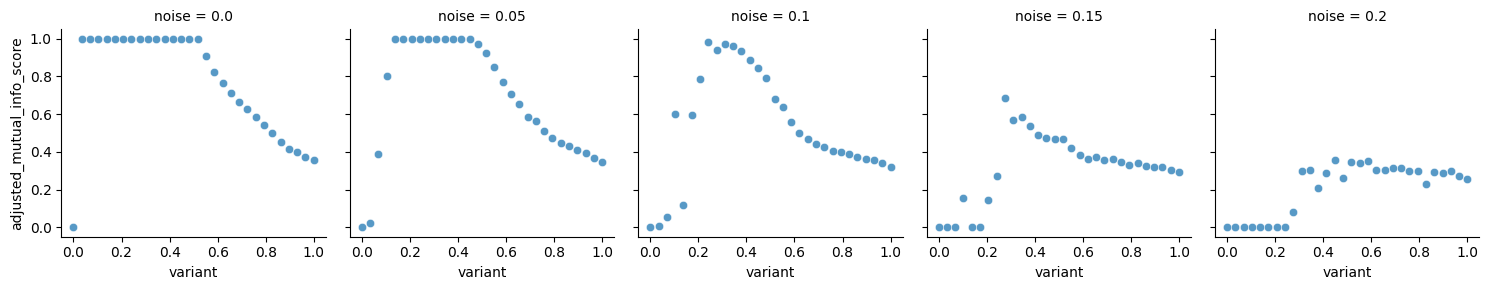

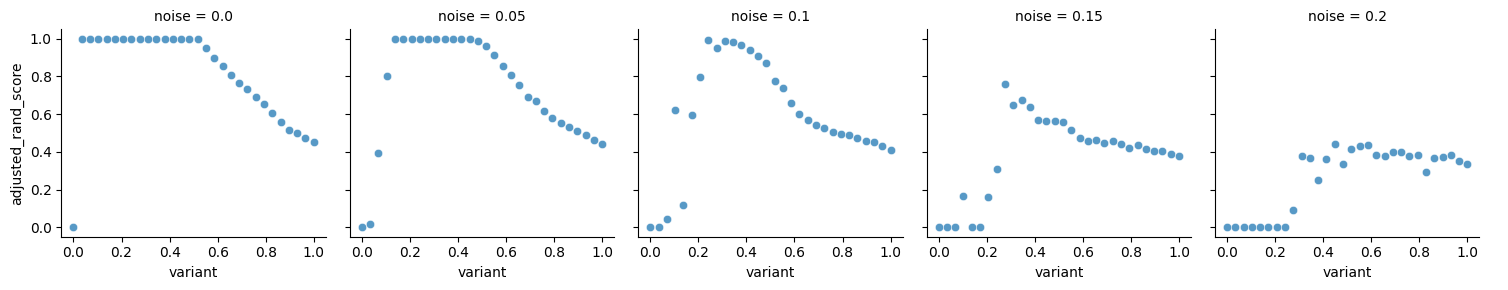

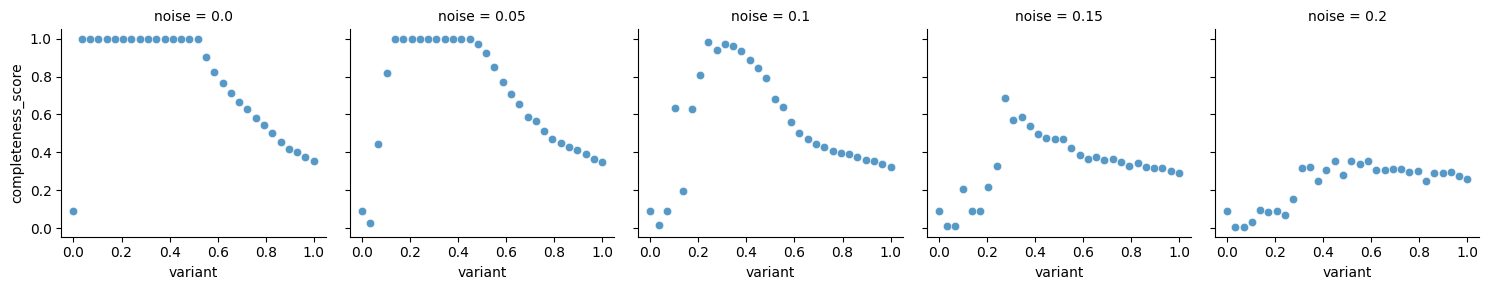

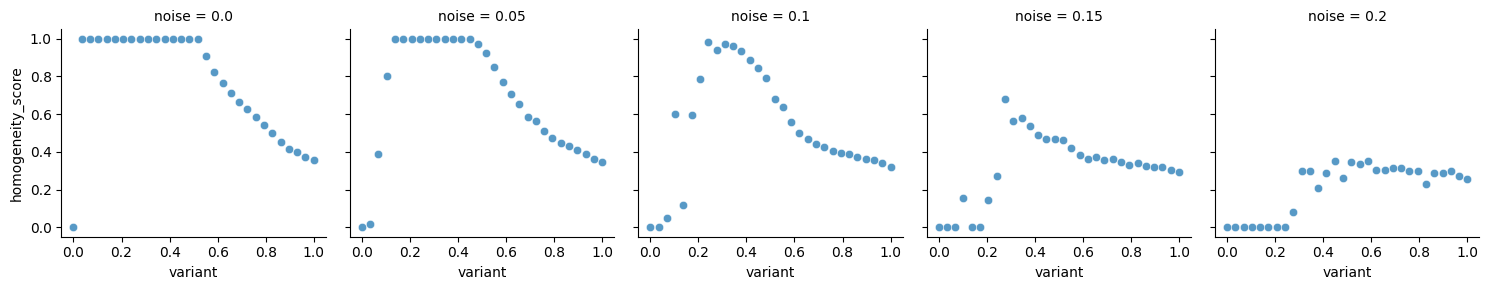

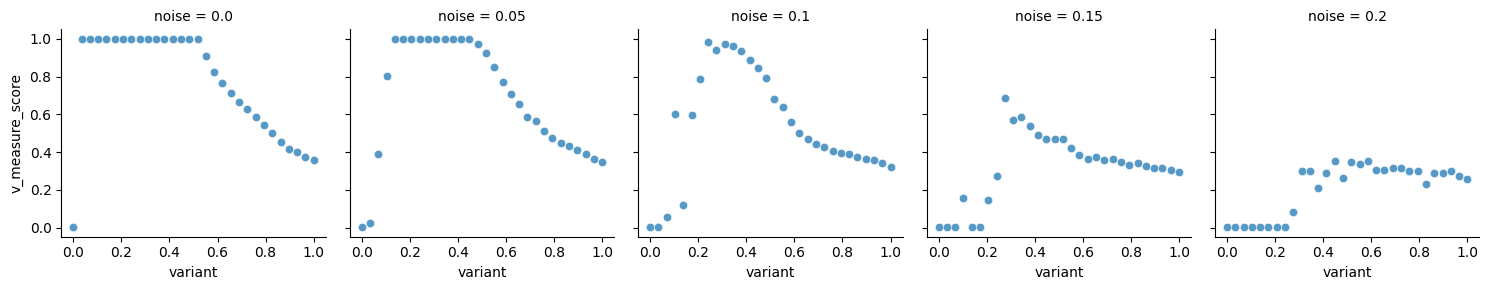

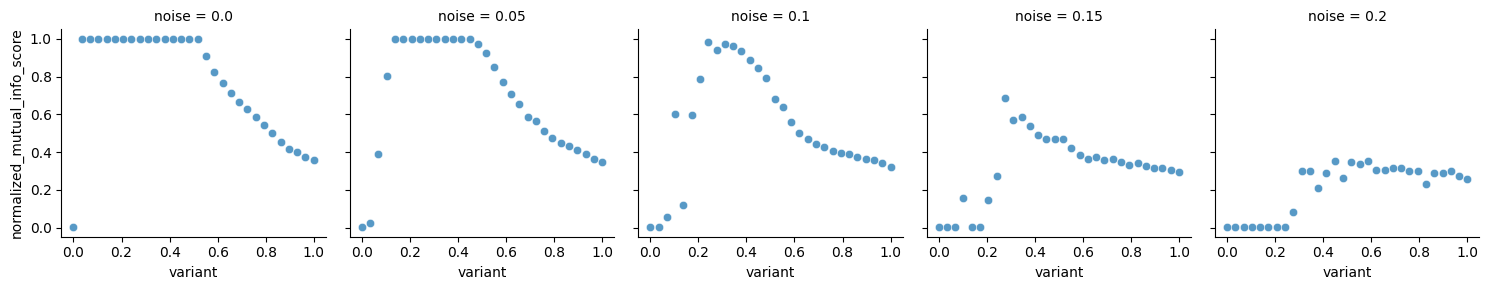

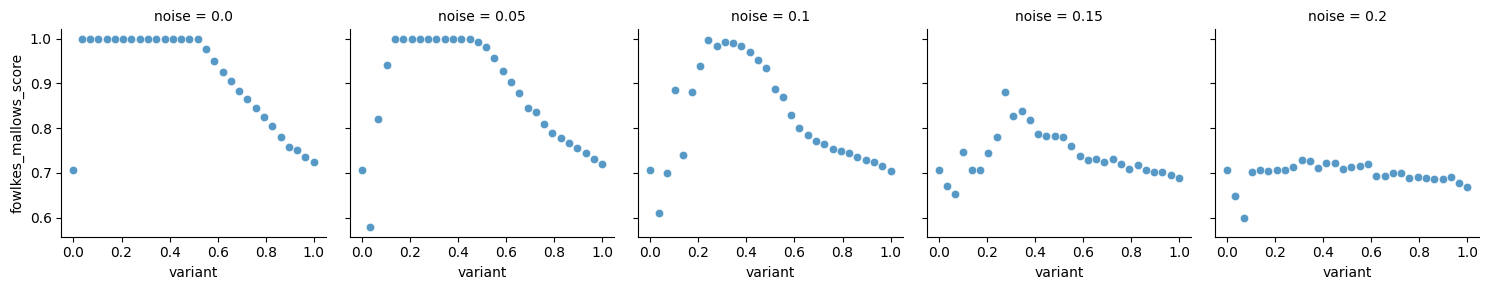

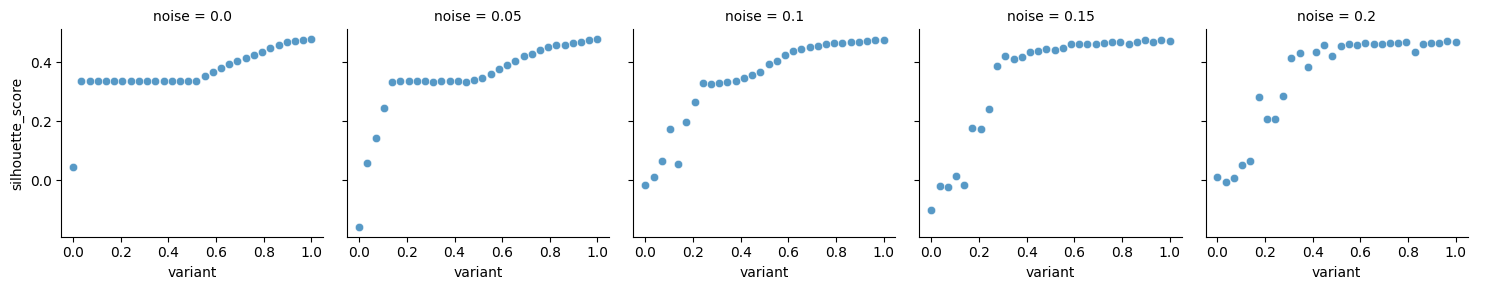

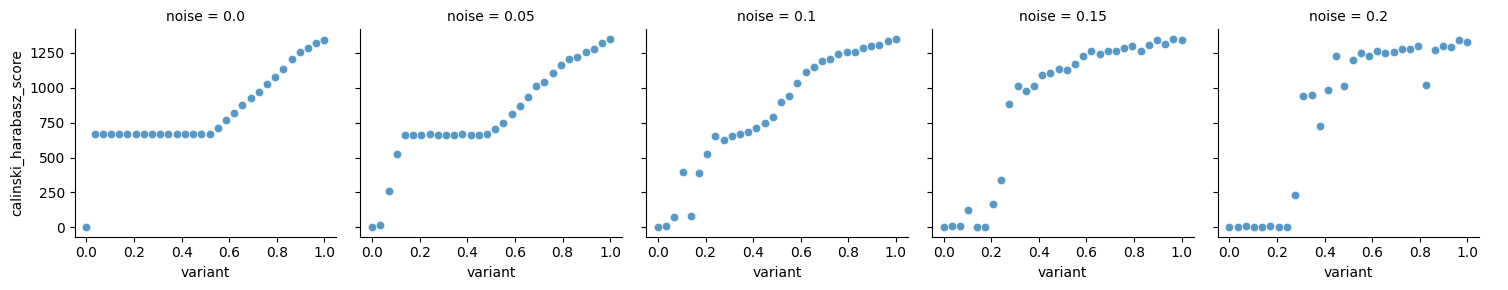

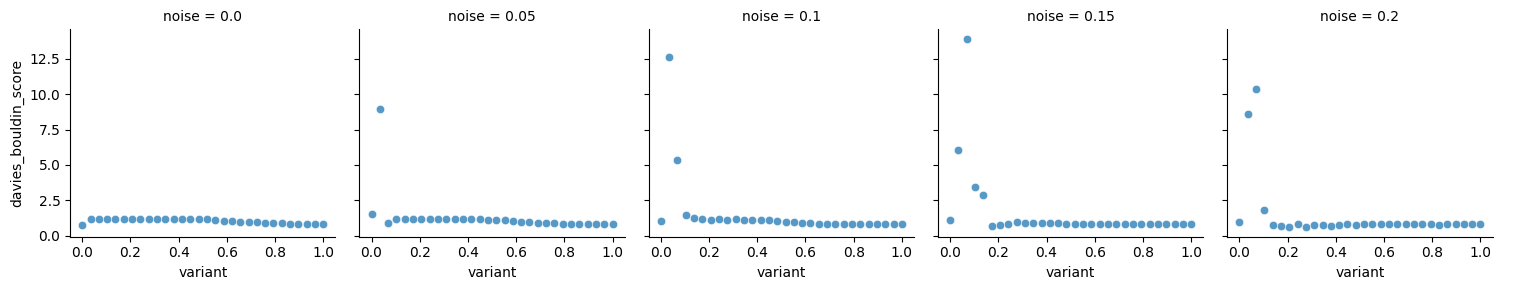

In [46]:
def show_refinement_experiment_results(experiment, metrics = DEFAULT_METRICS):

    # filter given experiment, average out over repeats
    experiment_results = results_df[(results_df['experiment'] == experiment)]
    summarised = experiment_results.groupby(['noise', 'variant', 'n_points']).mean(True).reset_index()

    # for each metric to plot, show a (single row) facetgrid 
    for metric in metrics:
        g = sns.FacetGrid(summarised, col="noise")
        g.map_dataframe(sns.scatterplot, "variant", metric, alpha = 0.75)
        g.add_legend()
        if metric == 'time':
            plt.yscale('log')
        plt.show()

show_refinement_experiment_results('Refinement EPS Impact')

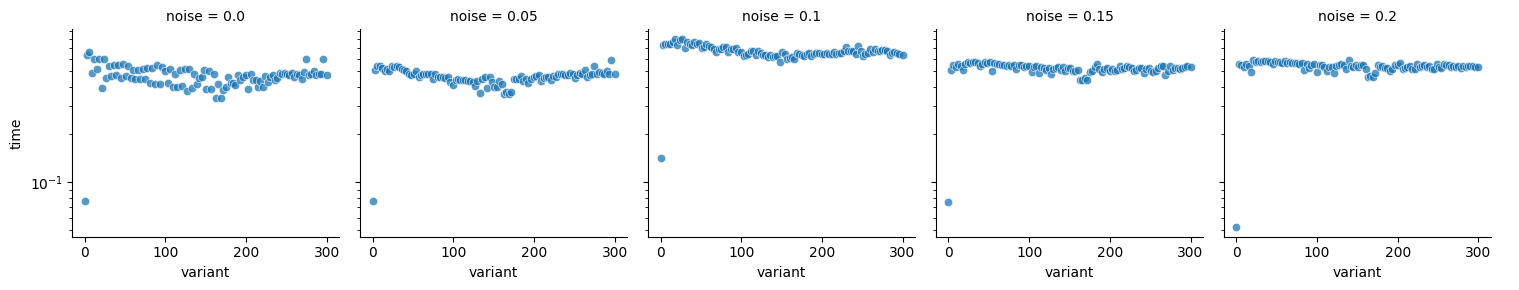

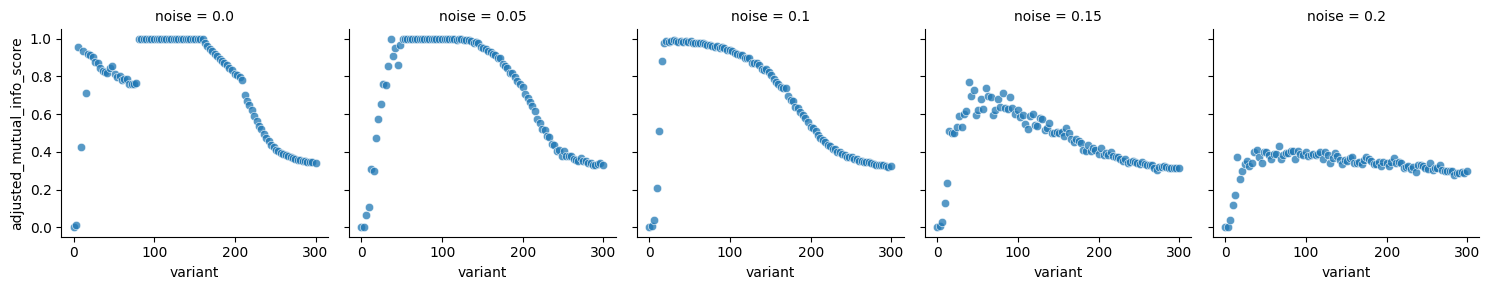

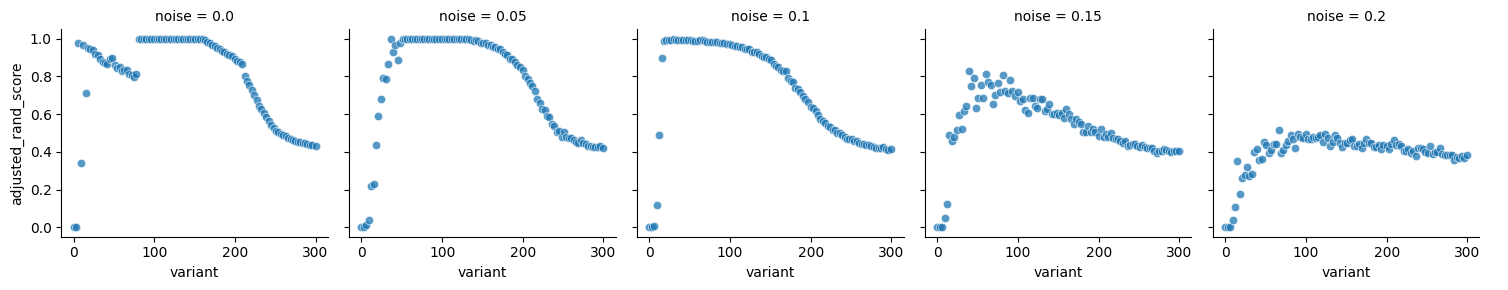

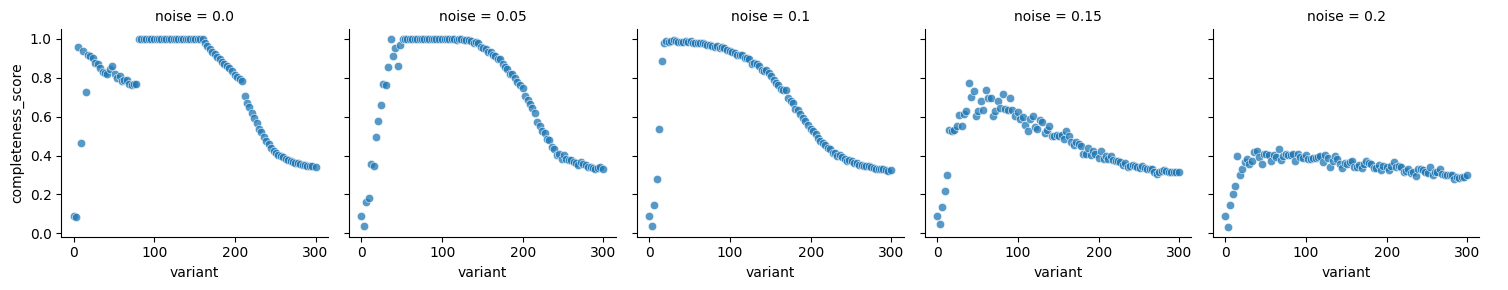

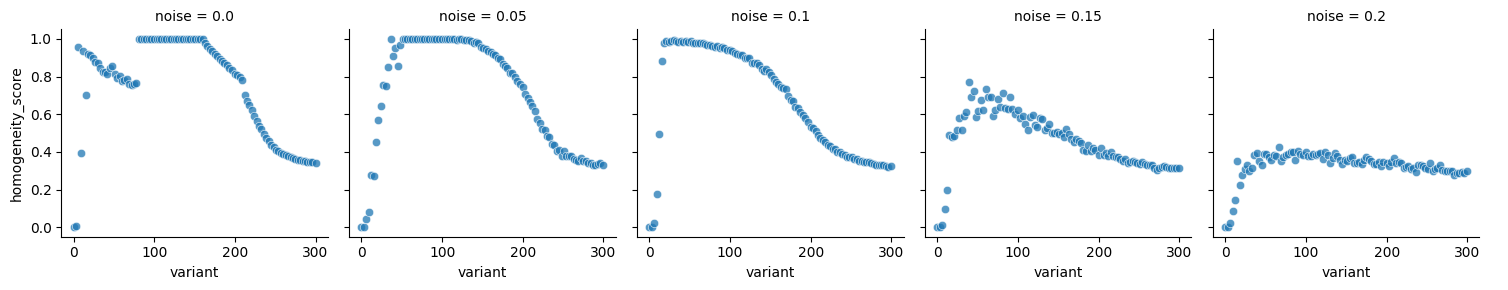

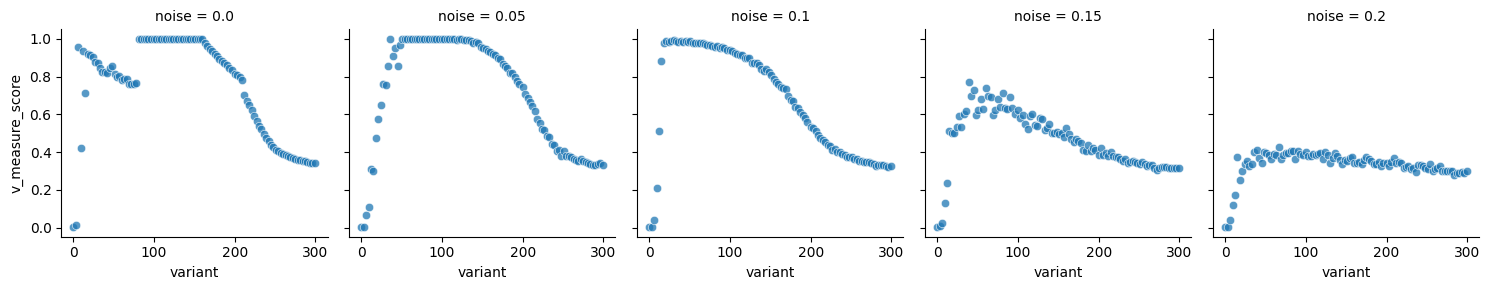

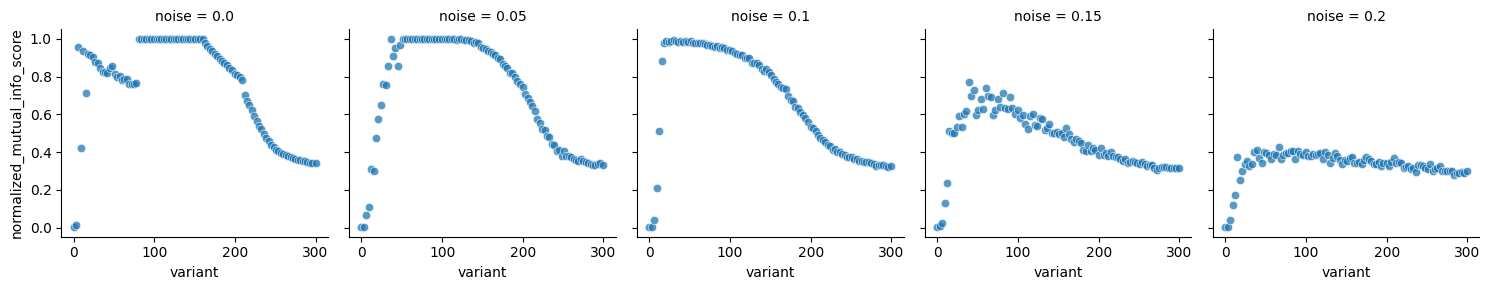

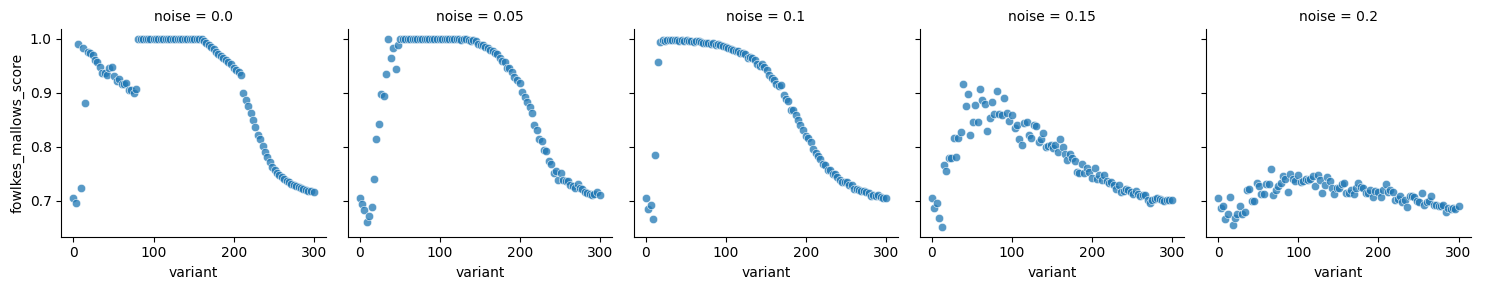

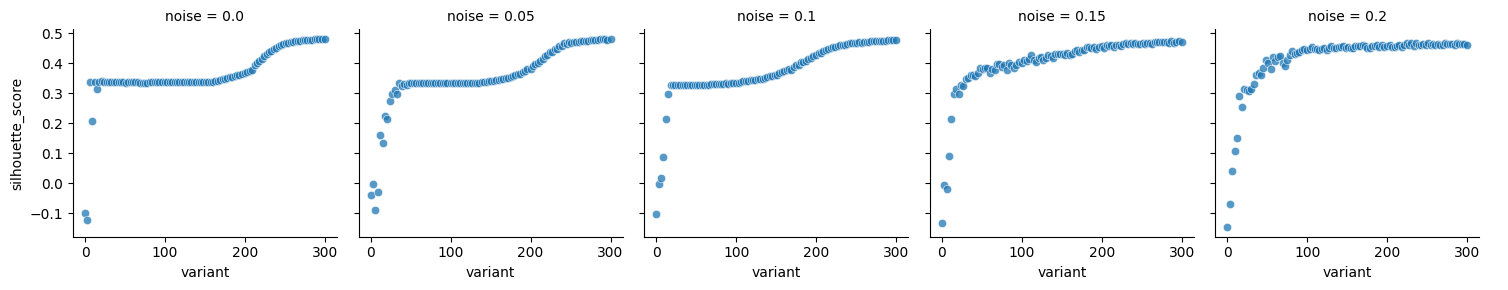

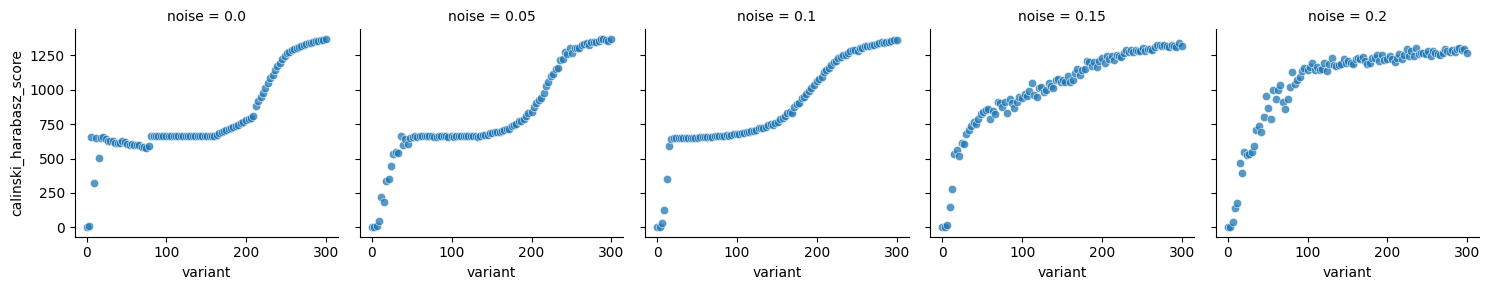

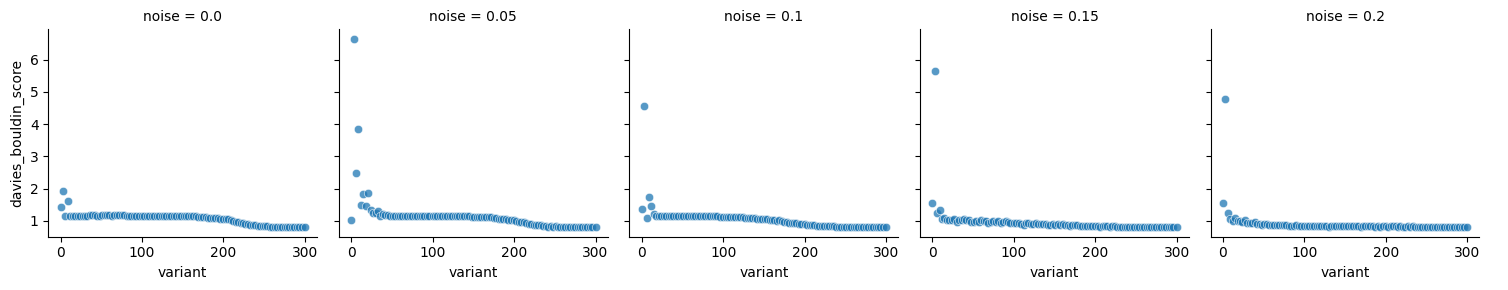

In [47]:
show_refinement_experiment_results('Refinement k Impact KNN')

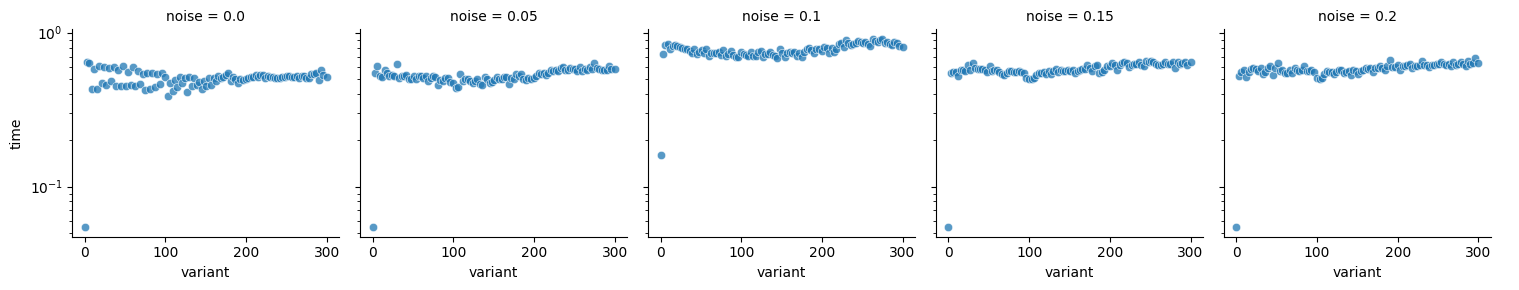

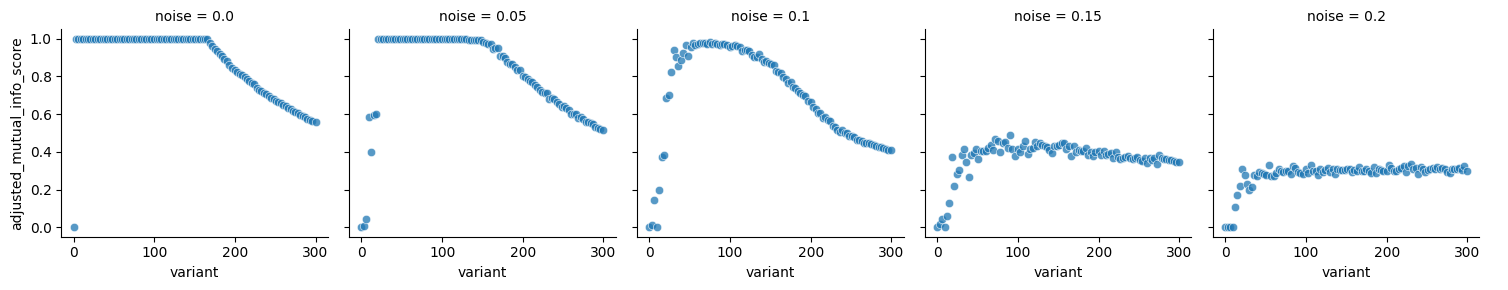

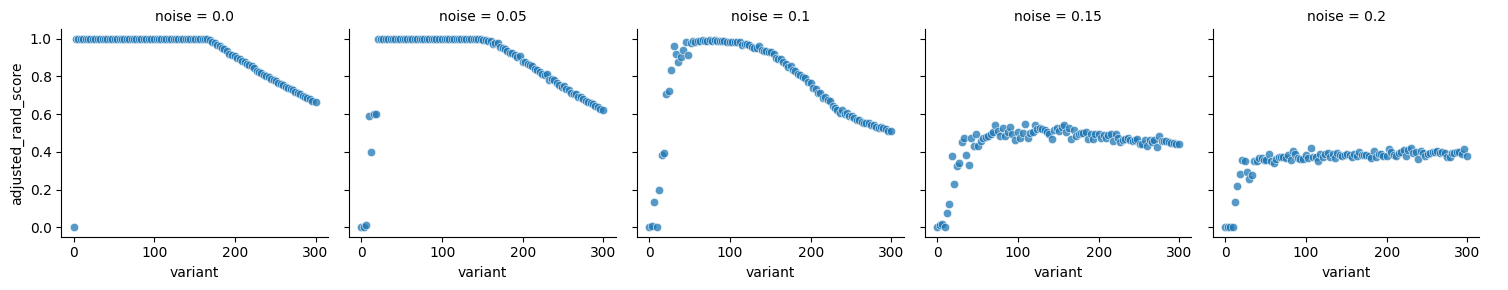

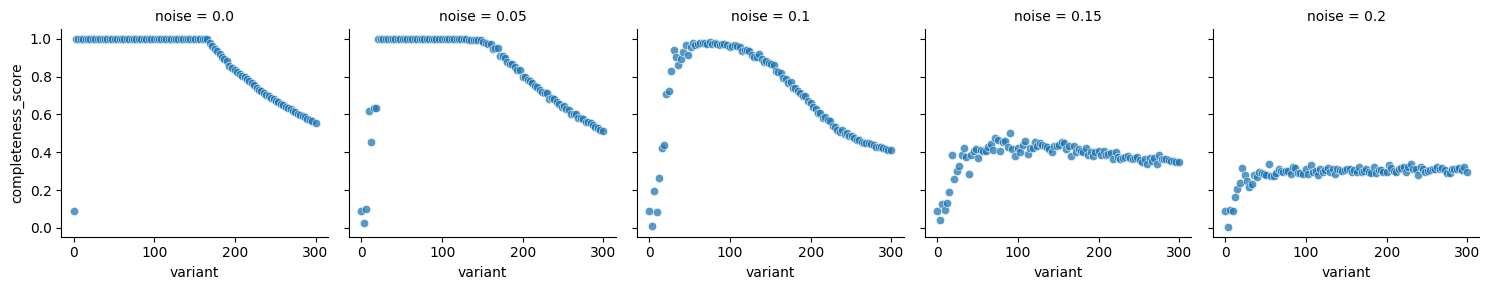

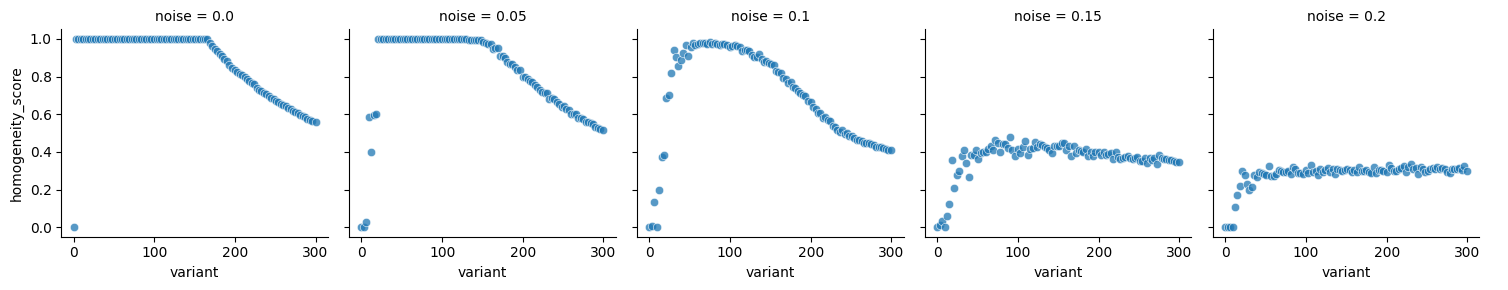

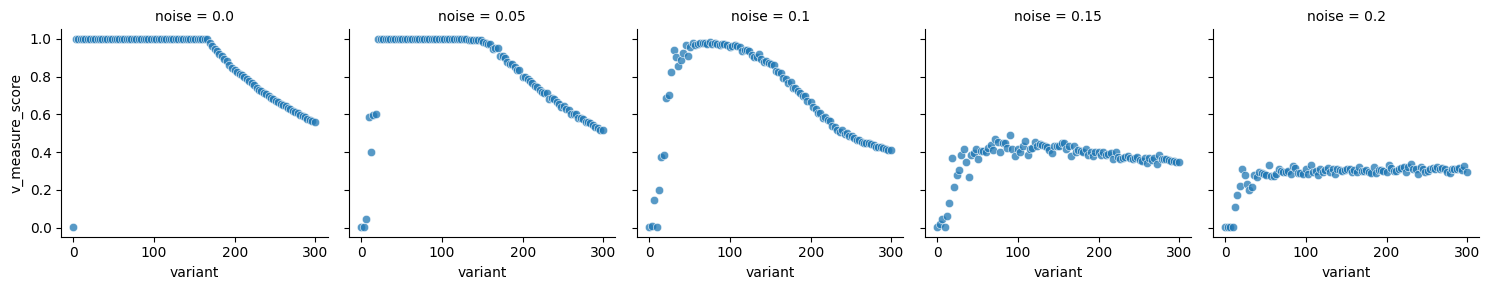

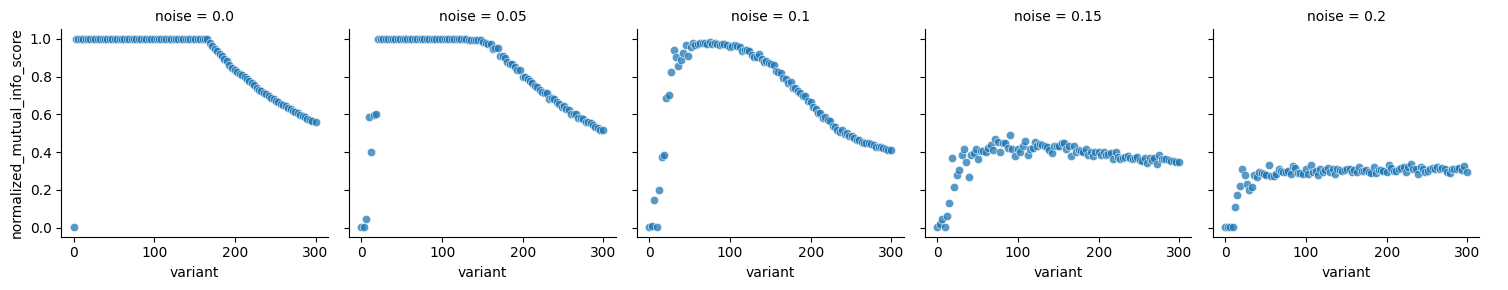

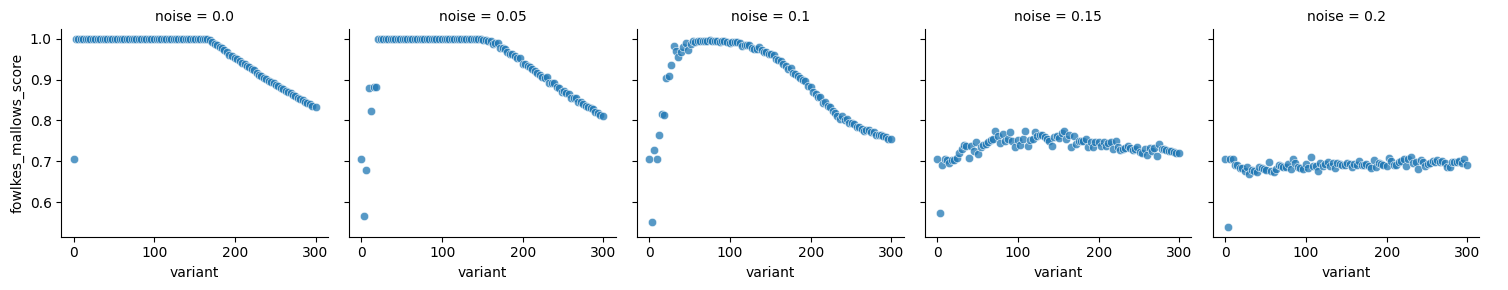

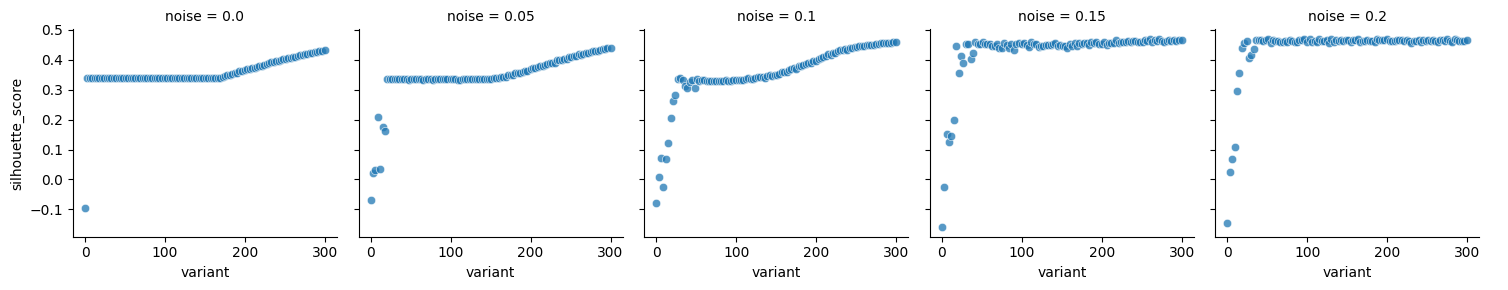

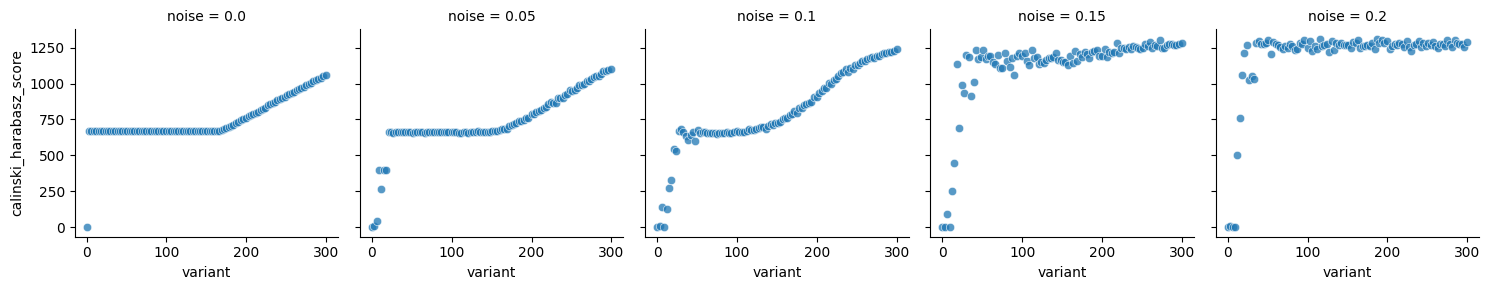

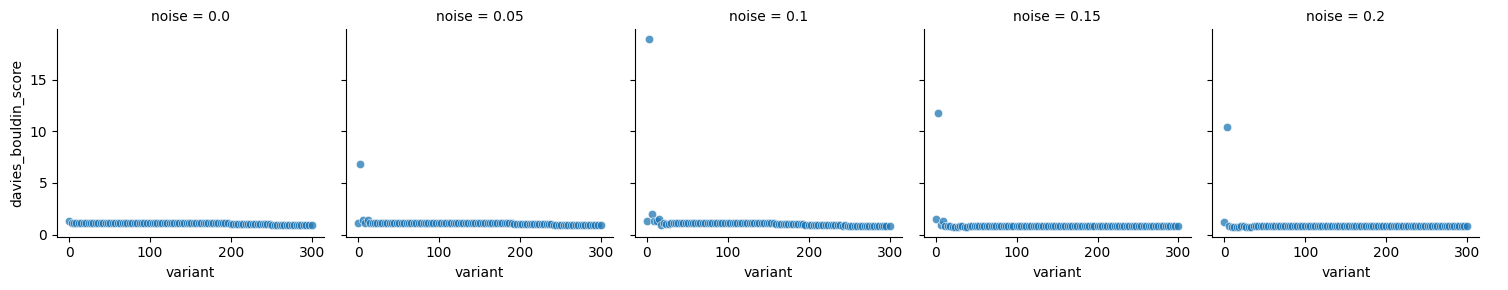

In [48]:
show_refinement_experiment_results('Refinement k Impact MKNN')

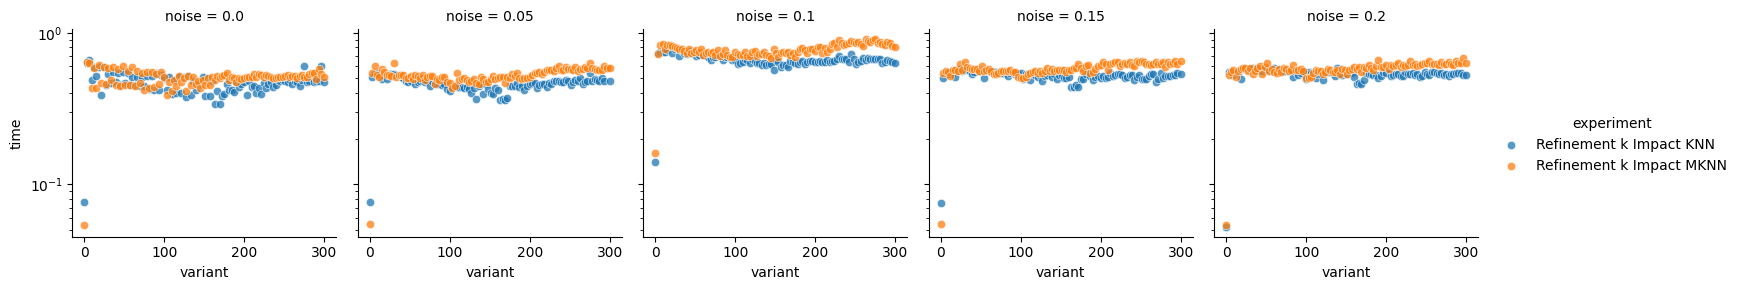

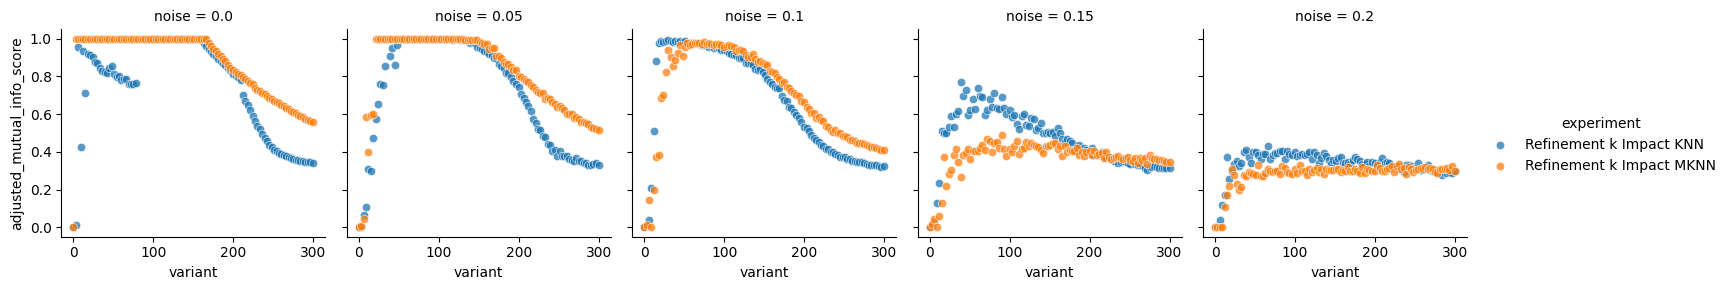

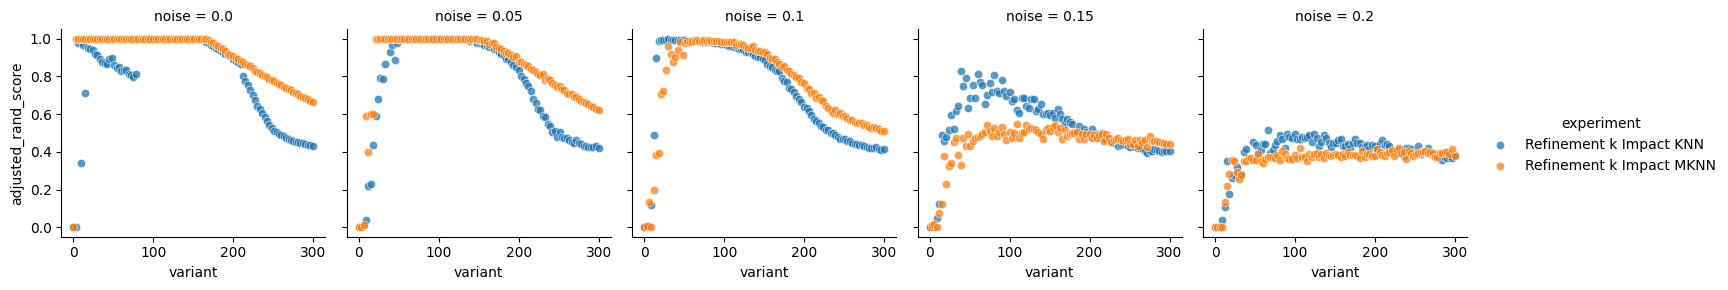

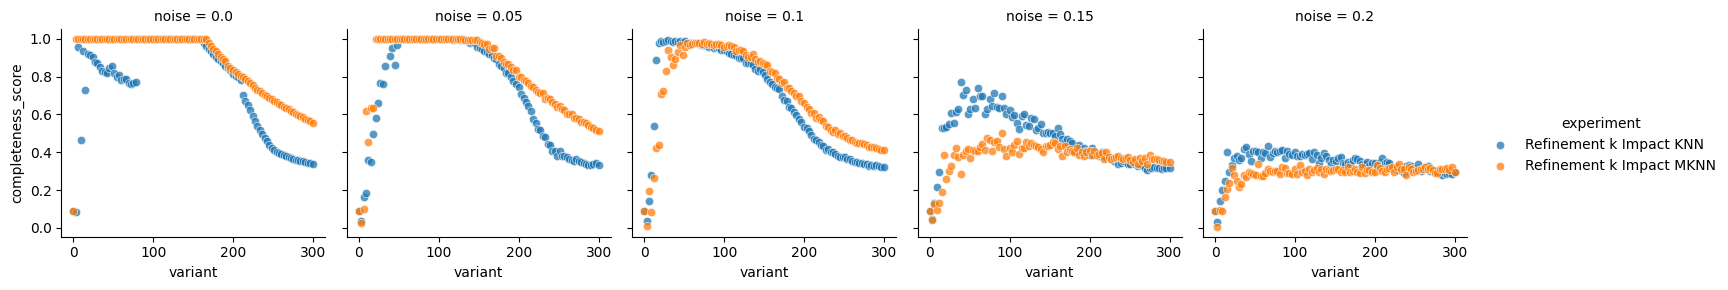

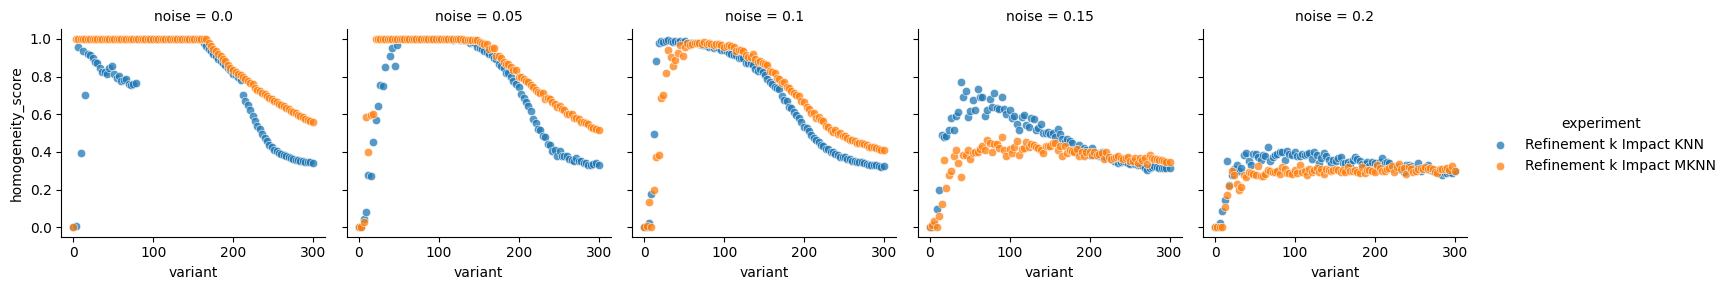

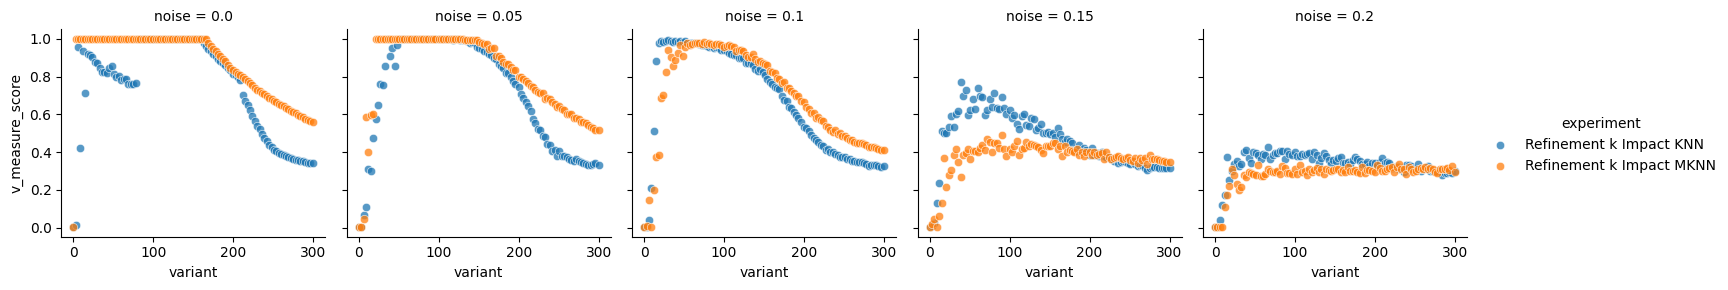

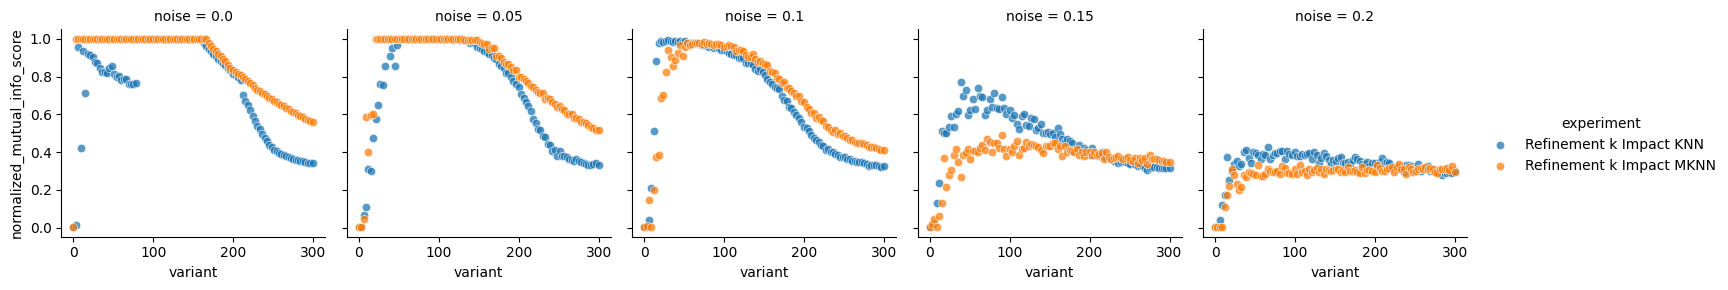

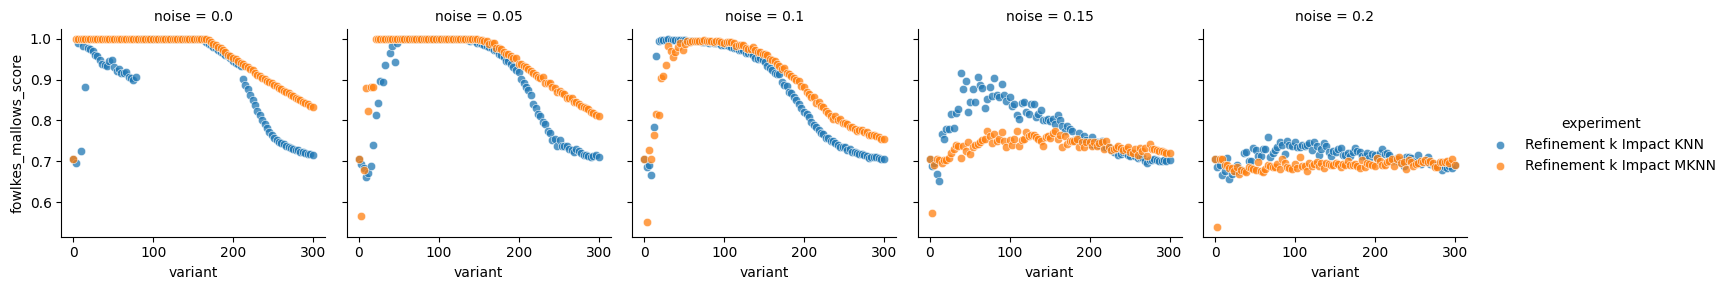

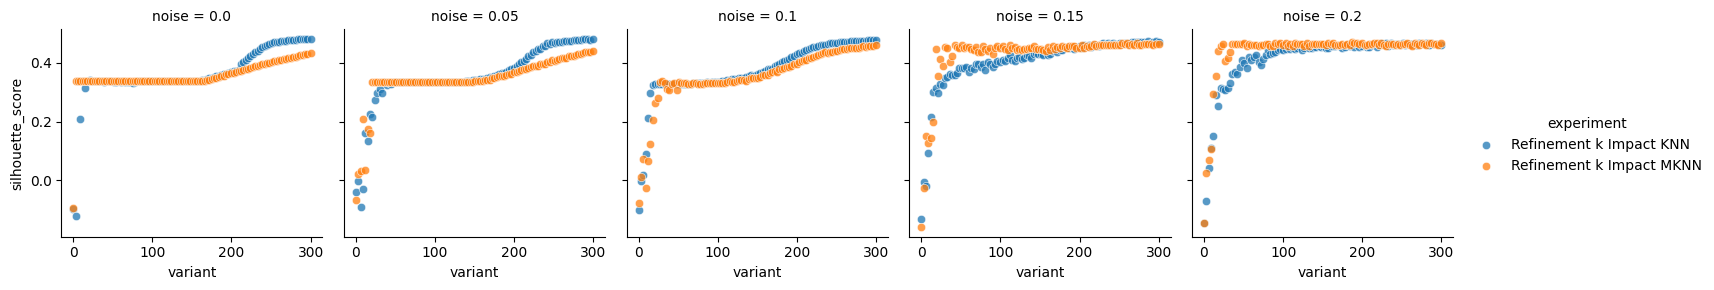

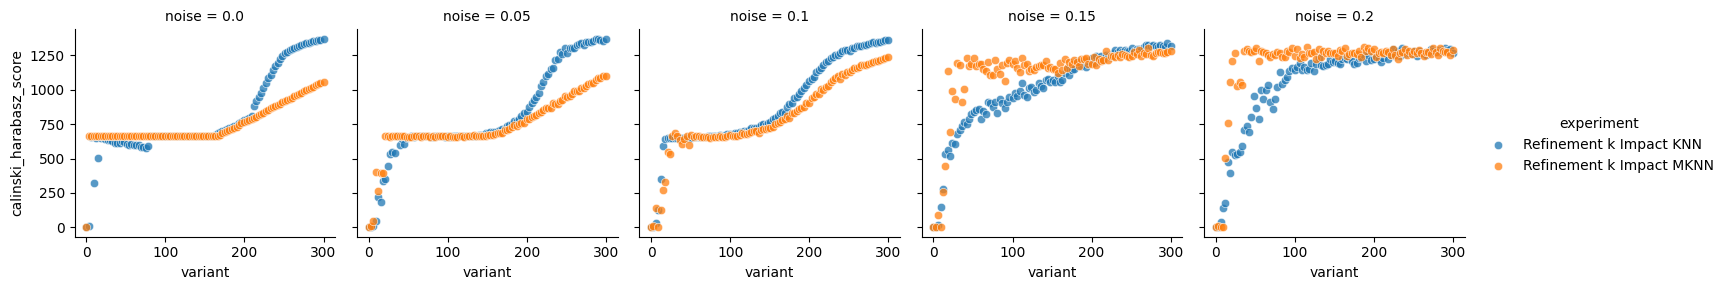

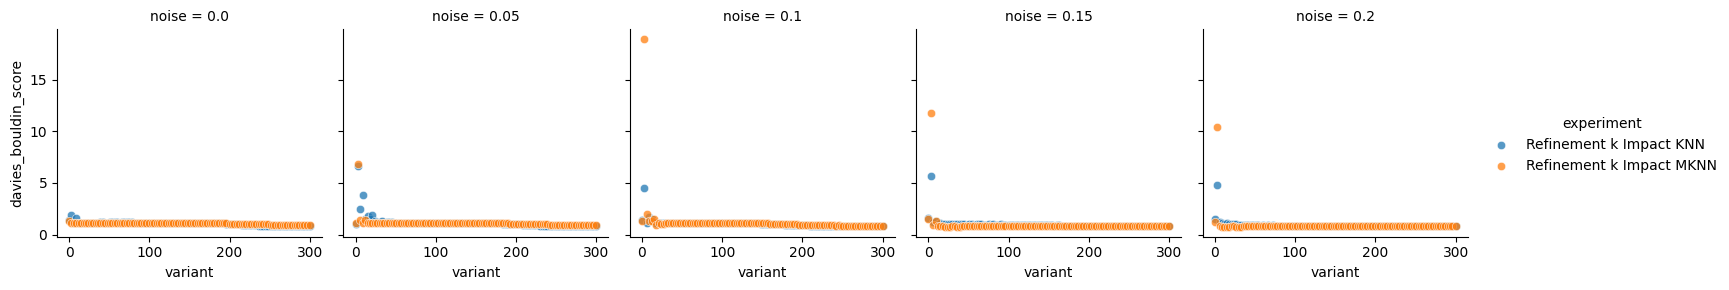

In [49]:
# extra comparison of KNN and MKNN wrt to k parameter used in refinement

# filter given experiment, average out over repeats
experiment_results = results_df[results_df['experiment'].isin(['Refinement k Impact MKNN', 'Refinement k Impact KNN'])]
summarised = experiment_results.groupby(['experiment', 'noise', 'variant', 'n_points']).mean(True).reset_index()

# for each metric to plot, show a (single row) facetgrid 
for metric in DEFAULT_METRICS:
    g = sns.FacetGrid(summarised, col="noise", hue='experiment')
    g.map_dataframe(sns.scatterplot, "variant", metric, alpha = 0.75)
    g.add_legend()
    if metric == 'time':
        plt.yscale('log')
    plt.show()